# import

In [143]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr#


In [1]:
import pandas as pd
import numpy as np
import os
import sys
from time import time

import numpy as np
from matplotlib import pyplot as plt

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular

In [2]:
from astropy.io import fits 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import cm
from astropy.table import Table
import os
from collections import OrderedDict
from adjustText import adjust_text

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [4]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

In [5]:
colors_10 = cm.get_cmap('tab10', 10)

In [149]:
def drop_index(data):
    data=data.reset_index(drop=True)
    return data

## cosmology

In [6]:
import numpy as np
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
import astropy
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)

## CLAGN_list_2020

In [7]:
CLAGN_list_2020=pd.read_excel('/Users/brettlv/blog/IHEP_sync/data/data_clagn/clagn_ned_list_20210201.xlsx',sheet_name='工作表1')
CLAGN_list_2020=CLAGN_list_2020[1:]

CLAGN_list_2020.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)
CLAGN_list_2020=CLAGN_list_2020[CLAGN_list_2020['     RA     '].notnull()]

CLAGN_list_2020=CLAGN_list_2020.reset_index(drop=True)

CLAGN_list_2020_coord=SkyCoord(ra=CLAGN_list_2020['     RA     '], dec=CLAGN_list_2020['    DEC  '], frame='icrs')

In [8]:
CLAGN_list_2020.columns

Index([' ', '      Input Object Name       ', '         Object Name          ',
       '     RA     ', '    DEC  ', 'Object', ' Redshift ', ' z  '],
      dtype='object')

In [9]:
len(CLAGN_list_2020)

68

CLAGN_list_2020['     RA     ']

CLAGN_list_2020['    DEC  ']

## CLAGN_list_2021_liu

In [13]:
CLAGN_list_2021_liu=pd.read_excel('/Users/brettlv/blog/IHEP_sync/data/data_clagn/CLAGN_with_RA_Dec_Liuhaov2.xlsx',sheet_name='sources')
#CLAGN_list_2021_liu=CLAGN_list_2020[1:]
CLAGN_list_2021_liu.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)
CLAGN_list_2021_liu=CLAGN_list_2021_liu[CLAGN_list_2021_liu['RA'].notnull()]
CLAGN_list_2021_liu=CLAGN_list_2021_liu.reset_index(drop=True)

CLAGN_list_2021_liu_coord=SkyCoord(ra=CLAGN_list_2021_liu['RA'], dec=CLAGN_list_2021_liu['DEC'], frame='icrs')
CLAGN_list_2021_liu['ra_deg']=CLAGN_list_2021_liu_coord.ra.deg
CLAGN_list_2021_liu['dec_deg']=CLAGN_list_2021_liu_coord.dec.deg

In [14]:
CLAGN_list_2021_liu.columns

Index(['Name', 'Unnamed: 1', 'RA', 'DEC', 'Ref.', 'Redshift', 'lg(MBH/Msun)',
       'Ref..1', 'Type', 'Note', 'Unnamed: 10', 'FIRST', 'ra_deg', 'dec_deg'],
      dtype='object')

In [37]:
CLAGN_list_2021_liu

Name Unnamed: 1              RA  \
0                      1ES 1927+654        NaN    19h27m19.54s   
1                       1H 0419-577        NaN   04h26m00.724s   
2                          3C 390.3        NaN  18h42m08.9899s   
3                       ESO 362-G18        NaN   05h19m35.798s   
4                         Fairall 9        NaN   01h23m45.776s   
..                              ...        ...             ...   
136        SDSS J224448.72+004347.1        NaN   22h44m48.724s   
137  SDSS J225240.37+010958.7              NaN   22h52m40.374s   
138  SDSS J233317.38-002303.4              NaN   23h33m17.389s   
139  SDSS J233602.98+001728.7              NaN   23h36m02.981s   
140        SDSS J235107.43-091318.0        NaN   23h51m07.437s   

                DEC              Ref.  Redshift  lg(MBH/Msun)  \
0      +65d33m54.2s  arxiv:1903.11084   0.01700          7.30   
1     -57d12m00.97s   arxiv:1201.2169   0.10400          8.58   
2    +79d46m17.127s  arxiv:1909.02801   0.05613           NaN   
3     -32d39m27.31s  arxiv:1805.01485   0.01244          7.65   
4     -58d48m20.82s  arxiv:1909.02801   0.04614          8.41   
..              ...               ...       ...           ...   
136   +00d43m47.16s  arxiv:1908.00072   0.63690          7.80   
137   +01d09m58.71s  arxiv:1810.00087   0.53333          8.20   
138   -00d23m03.48s  arxiv:1509.08393   0.51302          8.30   
139   +00d17m28.74s  arxiv:1509.03634   0.24279          8.26   
140   -09d13m18.02s  arxiv:1810.00087   0.35447          7.90   

               Ref..1    Type                    Note  Unnamed: 10  FIRST  \
0    arxiv:2011.01954    TDE?                     NaN          NaN    NaN   
1     arxiv:1401.5614      NH  介绍里说是CL源，但没有文献在正文说是CL源          NaN    NaN   
2                 NaN     NaN                     NaN          NaN    NaN   
3     arxiv:1407.1238   CL/NH                     NaN          NaN    NaN   
4    arxiv:1612.01369  CL old                     NaN          NaN    NaN   
..                ...     ...                     ...          ...    ...   
136  arxiv:1908.00072  CL AGN                     NaN          NaN    NaN   
137  arxiv:1905.02262     CLQ                     NaN          NaN    NaN   
138  arxiv:1905.02262     CLQ                     NaN          NaN    NaN   
139  arxiv:1903.02553     CLQ                     NaN          NaN    NaN   
140  arxiv:1905.02262     CLQ                     NaN          NaN    NaN   

         ra_deg    dec_deg  
0    291.831417  65.565056  
1     66.503017 -57.200269  
2    280.537458  79.771424  
3     79.899158 -32.657586  
4     20.940733 -58.805783  
..          ...        ...  
136  341.203017   0.729767  
137  343.168225   1.166308  
138  353.322454  -0.384300  
139  354.012421   0.291317  
140  357.780987  -9.221672  

[141 rows x 14 columns]

In [15]:
len(CLAGN_list_2021_liu)

141

# FIRST

In [17]:
FIRST=fits.open('/Volumes/ExtremeSSD/Papers_Project/mwa_catalog_paper/catalog/first_14dec17.fits')

In [18]:
FIRST_data=FIRST[1].data

In [19]:
FIRST[1].data.columns

ColDefs(
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'SIDEPROB'; format = 'E'
    name = 'FPEAK'; format = 'E'; unit = 'mJy'
    name = 'FINT'; format = 'E'; unit = 'mJy'
    name = 'RMS'; format = 'E'; unit = 'mJy'
    name = 'MAJOR'; format = 'E'; unit = 'arcsec'
    name = 'MINOR'; format = 'E'; unit = 'arcsec'
    name = 'POSANG'; format = 'E'; unit = 'deg'
    name = 'FITTED_MAJOR'; format = 'E'; unit = 'arcsec'
    name = 'FITTED_MINOR'; format = 'E'; unit = 'arcsec'
    name = 'FITTED_POSANG'; format = 'E'; unit = 'deg'
    name = 'FLDNAME'; format = '12A'
    name = 'NSDSS'; format = 'I'
    name = 'SDSS_SEP'; format = 'E'; unit = 'arcsec'
    name = 'SDSS_MAG'; format = 'E'
    name = 'SDSS_CLASS'; format = 'A'
    name = 'NTMASS'; format = 'I'
    name = 'TMASS_SEP'; format = 'E'; unit = 'arcsec'
    name = 'TMASS_MAG'; format = 'E'
    name = 'YEAR'; format = 'E'; unit = 'year'
    name = 'MJD'; format = 'D'; unit = 'da

FIRST_coord=SkyCoord(ra=FIRST[1].data['RA'], dec=FIRST[1].data['DEC'], frame='icrs')

## crossmatch

imX = np.empty((len(CLAGN_list_2020_coord), 2), dtype=np.float64)
imX[:, 0] = CLAGN_list_2020_coord.ra.deg
imX[:, 1] = CLAGN_list_2020_coord.dec.deg

stX = np.empty((len(FIRST_data), 2), dtype=np.float64)
stX[:, 0] = FIRST_data['RA']
stX[:, 1] = FIRST_data['DEC']


#crossmatch catalogs
#max_radius = 1. / 3600  # 1 arcsec
#max_radius = 5  # 1 degree
max_radius = 10. / 3600  # 60 arcsec

dist, ind = crossmatch_angular(imX, stX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (imX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 10)
plt.show()


In [ ]:
ind[match]

In [ ]:
30/141

In [ ]:
18/68

## CLAGN_list_2021_liu_coord

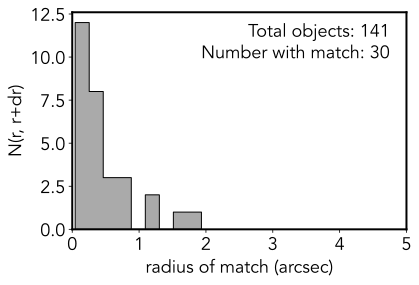

In [20]:
crosslist=CLAGN_list_2021_liu_coord
imX = np.empty((len(CLAGN_list_2021_liu_coord), 2), dtype=np.float64)
imX[:, 0] = CLAGN_list_2021_liu_coord.ra.deg
imX[:, 1] = CLAGN_list_2021_liu_coord.dec.deg

stX = np.empty((len(FIRST_data), 2), dtype=np.float64)
stX[:, 0] = FIRST_data['RA']
stX[:, 1] = FIRST_data['DEC']


# crossmatch catalogs
#max_radius = 1. / 3600  # 1 arcsec
#max_radius = 5  # 1 degree
max_radius = 10. / 3600  # 60 arcsec

dist, ind = crossmatch_angular(imX, stX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (imX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 5)
plt.show()


## counts match

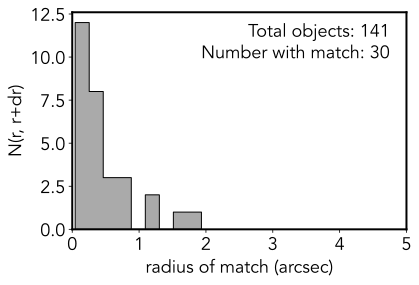

In [21]:
crosslist=CLAGN_list_2021_liu_coord
imX = np.empty((len(CLAGN_list_2021_liu_coord), 2), dtype=np.float64)
imX[:, 0] = CLAGN_list_2021_liu_coord.ra.deg
imX[:, 1] = CLAGN_list_2021_liu_coord.dec.deg

stX = np.empty((len(FIRST_data), 2), dtype=np.float64)
stX[:, 0] = FIRST_data['RA']
stX[:, 1] = FIRST_data['DEC']


# crossmatch catalogs
#max_radius = 1. / 3600  # 1 arcsec
#max_radius = 5  # 1 degree
max_radius = 5. / 3600  # 60 arcsec

dist, ind = crossmatch_angular(stX, imX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (imX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 5)
plt.show()

In [22]:
from collections import Counter
ind_remove_rep=[]

for i in ind[match]:
    if i not in ind_remove_rep:
        ind_remove_rep.append(i)
        
ind_remove_rep=np.array(ind_remove_rep)        
a=Counter(ind[match])

In [23]:
a,ind_remove_rep

(Counter({41: 1,
          125: 1,
          105: 1,
          94: 1,
          86: 1,
          29: 1,
          6: 1,
          61: 1,
          30: 1,
          32: 1,
          91: 1,
          100: 1,
          56: 1,
          35: 1,
          25: 1,
          14: 1,
          124: 1,
          31: 1,
          13: 1,
          38: 1,
          40: 1,
          80: 1,
          71: 1,
          136: 1,
          10: 1,
          132: 1,
          17: 1,
          11: 1,
          12: 1,
          15: 1}),
 array([ 41, 125, 105,  94,  86,  29,   6,  61,  30,  32,  91, 100,  56,
         35,  25,  14, 124,  31,  13,  38,  40,  80,  71, 136,  10, 132,
         17,  11,  12,  15]))

In [42]:
[ind_remove_rep[np.arange(len(ind_remove_rep))]]

[array([ 41, 125, 105,  94,  86,  29,   6,  61,  30,  32,  91, 100,  56,
         35,  25,  14, 124,  31,  13,  38,  40,  80,  71, 136,  10, 132,
         17,  11,  12,  15])]

In [24]:
CLAGN_list_2021_liu['Name'][ind_remove_rep[np.arange(len(ind_remove_rep))]].str.strip()

41                   PG 1535+547
125     SDSS J162752.18+541912.5
105     SDSS J141324.27+530527.0
94      SDSS J122550.30+510846.3
86       2MASX J11180325+4506463
29                      NGC 4051
6                         IC 751
61      SDSS J082942.67+415436.9
30                      NGC 4151
32                      NGC 4395
91      WISE J115227.47+320959.3
100     SDSS J131615.95+301552.2
56      SDSS J080020.98+263648.8
35                      NGC 5548
25                      NGC 2622
14                       Mrk 883
124     SDSS J162501.43+241547.3
31                      NGC 4388
13                       Mrk 728
38                      NGC 7469
40                      NGC 7674
80     WISEA J110455.17+011856.6
71      SDSS J094810.92+005057.8
136     SDSS J224448.72+004347.1
10                       Mrk 530
132     SDSS J214613.31+000930.8
17                      Mrk 1018
11                       Mrk 590
12                       Mrk 609
15                       Mrk 926
Name: Name

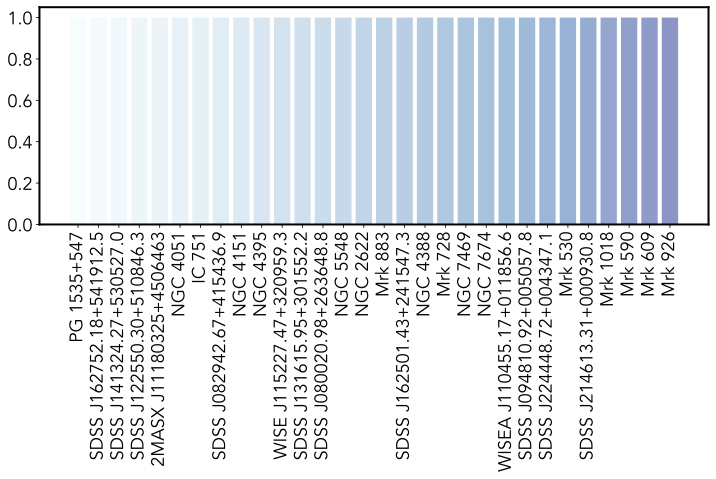

In [46]:
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)

colors = plt.cm.BuPu(np.linspace(0, 0.5, len(ind_remove_rep)))

for index,i in enumerate(a):#index 
    plt.bar(index,a[i],color=colors[index])
    #print(index,i,a[i])
    
plt.xticks(np.arange(len(ind_remove_rep)),CLAGN_list_2021_liu['Name'][ind_remove_rep[np.arange(len(ind_remove_rep))]].str.strip(),rotation=90)
#plt.title('within 5degree')
##plt.show()

## plot_flux

In [25]:
FIRST_data_copy=FIRST_data.copy()
new_table_CLAGN=FIRST_data_copy[match]
new_index=ind[match]
#new_table_CLAGN=FIRST_data_copy.reset_index(drop=True)

new_table_CLAGN.columns

new_table_CLAGN['RA'],new_table_CLAGN['DEC'],new_table_CLAGN['FINT']

## CLAGN_list_2021_liu_name_pos

In [26]:
CLAGN_list_2021_liu_name_pos=CLAGN_list_2021_liu[['Name','ra_deg','dec_deg']]

In [27]:
CLAGN_list_2021_liu_name_pos[CLAGN_list_2021_liu_name_pos['Name']=='PG 1535+547']

Name      ra_deg    dec_deg
41  PG 1535+547  234.159837  54.559225

In [28]:
for index,i in enumerate(new_index):
    print(index,i,CLAGN_list_2021_liu['Name'][i],CLAGN_list_2021_liu_name_pos['ra_deg'][i],CLAGN_list_2021_liu_name_pos['dec_deg'][i],new_table_CLAGN['FINT'][index])

0 41 PG 1535+547 234.15983749999995 54.559225 1.225
1 125 SDSS J162752.18+541912.5 246.9674375 54.32016666666667 18.09
2 105 SDSS J141324.27+530527.0       213.35112499999997 53.090805555555555 100.21233
3 94 SDSS J122550.30+510846.3 186.4596083333333 51.14621666666667 2.5881772
4 86 2MASX J11180325+4506463        169.51343749999998 45.11300555555556 14.246414
5 29 NGC 4051 180.79005833333332 44.53133333333333 19.343155
6 6 IC 751 179.71914999999998 42.57033611111112 43.010834
7 61 SDSS J082942.67+415436.9 127.42774583333329 41.91019444444444 4.5859046
8 30 NGC 4151 182.63574583333332 39.40573055555556 331.29483
9 32 NGC 4395 186.45359166666665 33.546927777777775 1.1747369
10 91 WISE J115227.47+320959.3 178.11465416666667 32.16646111111111 32.92363
11 100 SDSS J131615.95+301552.2       199.06647916666665 30.264519444444446 8.005674
12 56 SDSS J080020.98+263648.8       120.08743333333332 26.613530555555556 3.1326923
13 35 NGC 5548 214.49804166666664 25.136777777777777 24.423573
14 25 NG

for index,i in enumerate(new_index):
    print(index,i,CLAGN_list_2021_liu['Name'][i],new_table_CLAGN['RA'][index],new_table_CLAGN['DEC'][index],new_table_CLAGN['FINT'][index])

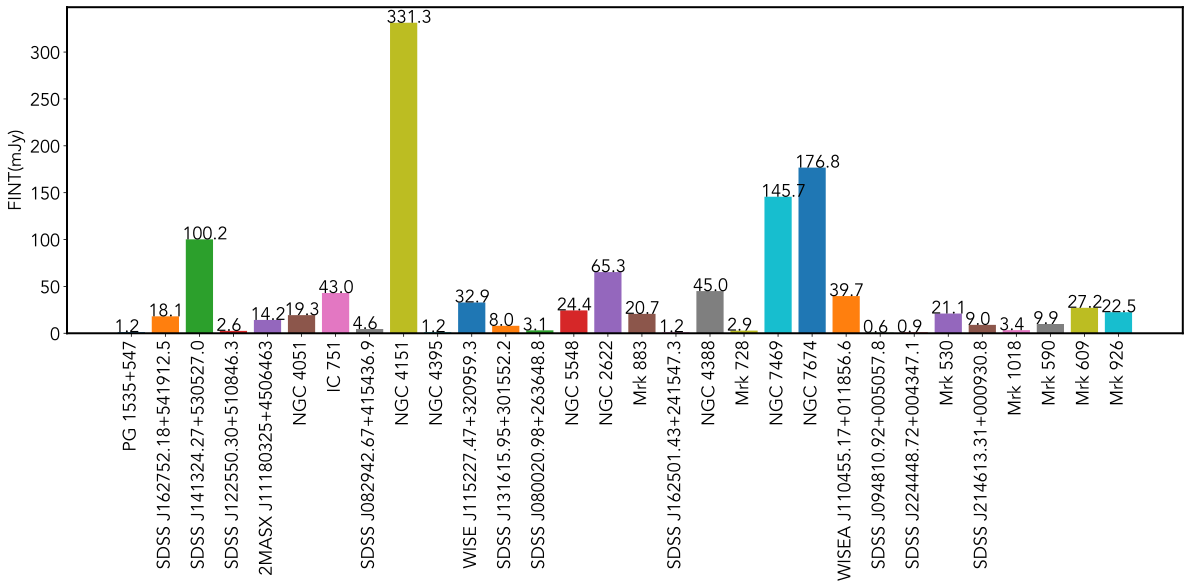

In [29]:
fig=plt.figure(figsize=(20,6))
ax=fig.add_subplot(111)

for index,i in enumerate(new_index):
    plt.bar(index,new_table_CLAGN['FINT'][index])
    #print(index,i,a[i])
    plt.text(index-0.5,new_table_CLAGN['FINT'][index],'%.1f'%new_table_CLAGN['FINT'][index])
    
plt.xticks(np.arange(len(new_index)),CLAGN_list_2021_liu['Name'][new_index[np.arange(len(new_index))]].str.strip(),rotation=90)
plt.ylabel('FINT(mJy)')
#plt.title('within 5degree')
plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/Flux_FIRST_CLAGN_crossmatch.png',dpi=400,transparent=False,bbox_inches='tight')
#plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/AGN_num_within5degree.png',dpi=400,transparent=False,bbox_inches='tight')

#plt.show()

In [56]:
CLAGN_list_2021_liu_name_pos[CLAGN_list_2021_liu_name_pos['Name']=='NGC 7469']

Name      ra_deg  dec_deg
38  NGC 7469  345.815083    8.874

## format print

print('{0:>15},{1:.2f},{2:.2f},{3:.2f},{4:.1f},{5:.2f}'.format(obs_id,float(powerlawindex),float(gerr90),float(indexerr),float(bins),float(rechied))+'\n')
print('{0:.2e},{1:.2e},{2:.2e},{3:.2e}'.format(float(flux),float(ferr),float(cflux_),float(cflux_err90))+'\n')


In [40]:
print("{0:<30},{1:<5},{2:<5},{3:<5},{4:<5},{5:<5}".format('Name','Redshift','lg(MBH/Msun)','RA','DEC','FINT'))
for index,i in enumerate(new_index):
    print("{0:<30},{1:.5f},{2:.2f},{3:.5f},{4:.5f},{5:.3F}".format(CLAGN_list_2021_liu['Name'][i],CLAGN_list_2021_liu['Redshift'][i],CLAGN_list_2021_liu['lg(MBH/Msun)'][i],new_table_CLAGN['RA'][index],new_table_CLAGN['DEC'][index],new_table_CLAGN['FINT'][index]))
    #data_format = '{0:>15},{1:%.5f},{2:%.5f},{3:%.5f},{4:%.3f}'.format(CLAGN_list_2021_liu['Name'][i],CLAGN_list_2021_liu['Redshift'][i],new_table_CLAGN['RA'][index],new_table_CLAGN['DEC'][index],new_table_CLAGN['FINT'][index])
    #print(data_format)
    #print(index,',',i,',',CLAGN_list_2021_liu['Name'][i],',',CLAGN_list_2021_liu['Redshift'][i],',',new_table_CLAGN['RA'][index],',',new_table_CLAGN['DEC'][index],',',new_table_CLAGN['FINT'][index])

Name                          ,Redshift,lg(MBH/Msun),RA   ,DEC  ,FINT 
PG 1535+547                   ,0.03893,7.34,234.16003,54.55926,1.225
SDSS J162752.18+541912.5      ,0.31553,nan,246.96749,54.32020,18.090
SDSS J141324.27+530527.0      ,0.45587,8.20,213.35102,53.09047,100.212
SDSS J122550.30+510846.3      ,0.16795,8.62,186.45963,51.14630,2.588
2MASX J11180325+4506463       ,0.10724,nan,169.51345,45.11299,14.246
NGC 4051                      ,0.00234,6.36,180.78997,44.53126,19.343
IC 751                        ,0.03150,8.50,179.71917,42.57040,43.011
SDSS J082942.67+415436.9      ,0.12632,8.49,127.42782,41.91024,4.586
NGC 4151                      ,0.00333,7.56,182.63563,39.40583,331.295
NGC 4395                      ,0.00106,5.56,186.45383,33.54680,1.175
WISE J115227.47+320959.3      ,0.37432,8.10,178.11464,32.16647,32.924
SDSS J131615.95+301552.2      ,0.04919,7.06,199.06619,30.26417,8.006
SDSS J080020.98+263648.8      ,0.02674,7.12,120.08742,26.61341,3.133
NGC 5548                 

for index,i in enumerate(new_index):
    #print('{0:<30},{1:.5f},{2:.5f},{3:.5f},{4:.3f}'.format(CLAGN_list_2021_liu['Name'][i],CLAGN_list_2021_liu['Redshift'][i],new_table_CLAGN['RA'][index],new_table_CLAGN['DEC'][index],new_table_CLAGN['FINT'][index]))
    data_format = '{0:<30},{1:.5f},{2:.5f},{3:.5f},{4:.3f}'.format(CLAGN_list_2021_liu['Name'][i],CLAGN_list_2021_liu['Redshift'][i],new_table_CLAGN['RA'][index],new_table_CLAGN['DEC'][index],new_table_CLAGN['FINT'][index])
    print(data_format)
    #print(index,',',i,',',CLAGN_list_2021_liu['Name'][i],',',CLAGN_list_2021_liu['Redshift'][i],',',new_table_CLAGN['RA'][index],',',new_table_CLAGN['DEC'][index],',',new_table_CLAGN['FINT'][index])

## CLAGN_X-ray FLUX

### Lbol

## FIRST_flux

In [42]:
FIRST_crossmatch=pd.read_excel('/Users/brettlv/blog/IHEP_sync/data/data_clagn/CLAGN_with_RA_Dec_Liuhaov2.xlsx',sheet_name='FIRST')
#CLAGN_list_2021_liu=CLAGN_list_2020[1:]

In [43]:
FIRST_crossmatch

Name                            Redshift  lg(MBH/Msun)      RA     \
0   PG 1535+547                      0.03893          7.34  234.16003   
1   SDSS J162752.18+541912.5         0.31553           NaN  246.96749   
2   SDSS J141324.27+530527.0         0.45587          8.20  213.35102   
3   SDSS J122550.30+510846.3         0.16795          8.62  186.45963   
4   2MASX J11180325+4506463          0.10724           NaN  169.51345   
5   NGC 4051                         0.00234          6.36  180.78997   
6   IC 751                           0.03150          8.50  179.71917   
7   SDSS J082942.67+415436.9         0.12632          8.49  127.42782   
8   NGC 4151                         0.00333          7.56  182.63563   
9   NGC 4395                         0.00106          5.56  186.45383   
10  WISE J115227.47+320959.3         0.37432          8.10  178.11464   
11  SDSS J131615.95+301552.2         0.04919          7.06  199.06619   
12  SDSS J080020.98+263648.8         0.02674          7.12  120.08742   
13  NGC 5548                         0.01717          7.51  214.49783   
14  NGC 2622                         0.02862           NaN  129.54563   
15  Mrk 883                          0.03787           NaN  247.47038   
16  SDSS J162501.43+241547.3         0.05030          6.66  246.25605   
17  NGC 4388                         0.00842          6.92  186.44480   
18  Mrk 728                          0.03562           NaN  165.25742   
19  NGC 7469                         0.01632          7.32  345.81503   
20  NGC 7674                         0.02903          7.56  351.98625   
21  WISEA J110455.17+011856.6        0.57515          8.20  166.22978   
22  SDSS J094810.92+005057.8         0.62446          7.40  147.04546   
23  SDSS J224448.72+004347.1         0.63690          7.80  341.20318   
24  Mrk 530                          0.02876          8.06  349.73610   
25  SDSS J214613.31+000930.8         0.62204          8.30  326.55550   
26  Mrk 1018                         0.04296          7.84   31.56664   
27  Mrk 590                          0.02638          7.50   33.63982   
28  Mrk 609                          0.03441           NaN   51.35568   
29  Mrk 926                          0.04702          8.05  346.18118   

       DEC       FINT    logLx  logLxmax  
0   54.55926    1.225  42.9000       NaN  
1   54.32020   18.090      NaN       NaN  
2   53.09047  100.212      NaN       NaN  
3   51.14630    2.588      NaN       NaN  
4   45.11299   14.246      NaN       NaN  
5   44.53126   19.343  41.0379   41.5879  
6   42.57040   43.011  42.7000   43.7000  
7   41.91024    4.586      NaN       NaN  
8   39.40583  331.295  42.1100   42.3200  
9   33.54680    1.175  40.2301   40.3901  
10  32.16647   32.924      NaN       NaN  
11  30.26417    8.006      NaN       NaN  
12  26.61341    3.133      NaN       NaN  
13  25.13728   24.424  43.1100   43.5300  
14  24.89524   65.310      NaN       NaN  
15  24.44401   20.734      NaN       NaN  
16  24.26328    1.204      NaN       NaN  
17  12.66177   45.025  41.7800   42.6000  
18  11.04689    2.859      NaN       NaN  
19   8.87393  145.679  43.2300   43.5800  
20   8.77896  176.775      NaN       NaN  
21   1.31577   39.716      NaN       NaN  
22   0.84928    0.633      NaN       NaN  
23   0.72964    0.943      NaN       NaN  
24   0.24389   21.096  44.2391       NaN  
25   0.15856    9.024      NaN       NaN  
26  -0.29146    3.364      NaN       NaN  
27  -0.76671    9.902      NaN       NaN  
28  -6.14383   27.229      NaN       NaN  
29  -8.68572   22.478  44.2011       NaN

In [44]:
D_cm=cosmo.luminosity_distance(z=FIRST_crossmatch['Redshift']).to(u.cm)
FIRST_crossmatch['D_cm']=D_cm

1Jy = 10-23erg/cm2/s/Hz

In [47]:
FIRST_crossmatch['L_INT']=4*np.pi*FIRST_crossmatch['D_cm']**2*FIRST_crossmatch['FINT']*1e-26*1.4*1e9

In [69]:
FIRST_crossmatch.columns

Index(['Name                          ', 'Redshift', 'lg(MBH/Msun)', 'RA   ',
       'DEC  ', 'FINT', 'logLx', 'logLxmax', 'D_cm', 'L_INT'],
      dtype='object')

In [83]:
ax.axhline?

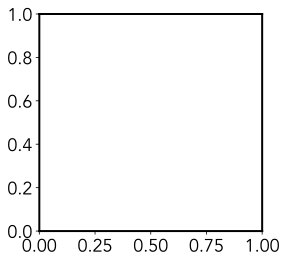

In [75]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(FIRST_crossmatch)):        
    if not pd.isnull(FIRST_crossmatch.iloc[i]['logLxmax']):
        
        

plt.hist(FIRST_crossmatch['Redshift'])

plt.hist(FIRST_crossmatch['L_INT'],bins=5)

In [ ]:
'''            print(np.log10(FIRST_crossmatch.iloc[i]['L_INT']),
                  FIRST_crossmatch.iloc[i]['logLx'],
                  FIRST_crossmatch.iloc[i]['logLxmax'])'''

In [92]:
FIRST_crossmatch_select=FIRST_crossmatch[FIRST_crossmatch['logLx'].notnull()]
FIRST_crossmatch_select=FIRST_crossmatch_select.reset_index(drop=True)

In [93]:
FIRST_crossmatch_select

Name                            Redshift  lg(MBH/Msun)      RA     \
0  PG 1535+547                      0.03893          7.34  234.16003   
1  NGC 4051                         0.00234          6.36  180.78997   
2  IC 751                           0.03150          8.50  179.71917   
3  NGC 4151                         0.00333          7.56  182.63563   
4  NGC 4395                         0.00106          5.56  186.45383   
5  NGC 5548                         0.01717          7.51  214.49783   
6  NGC 4388                         0.00842          6.92  186.44480   
7  NGC 7469                         0.01632          7.32  345.81503   
8  Mrk 530                          0.02876          8.06  349.73610   
9  Mrk 926                          0.04702          8.05  346.18118   

      DEC       FINT    logLx  logLxmax          D_cm         L_INT  
0  54.55926    1.225  42.9000       NaN  5.297759e+26  6.048648e+37  
1  44.53126   19.343  41.0379   41.5879  3.097956e+25  3.265971e+36  
2  42.57040   43.011  42.7000   43.7000  4.263277e+26  1.375323e+39  
3  39.40583  331.295  42.1100   42.3200  4.412000e+25  1.134550e+38  
4  33.54680    1.175  40.2301   40.3901  1.401960e+25  4.063001e+34  
5  25.13728   24.424  43.1100   43.5300  2.299058e+26  2.271195e+38  
6  12.66177   45.025  41.7800   42.6000  1.119958e+26  9.935622e+37  
7   8.87393  145.679  43.2300   43.5800  2.183839e+26  1.222295e+39  
8   0.24389   21.096  44.2391       NaN  3.884541e+26  5.600378e+38  
9  -8.68572   22.478  44.2011       NaN  6.436459e+26  1.638286e+39

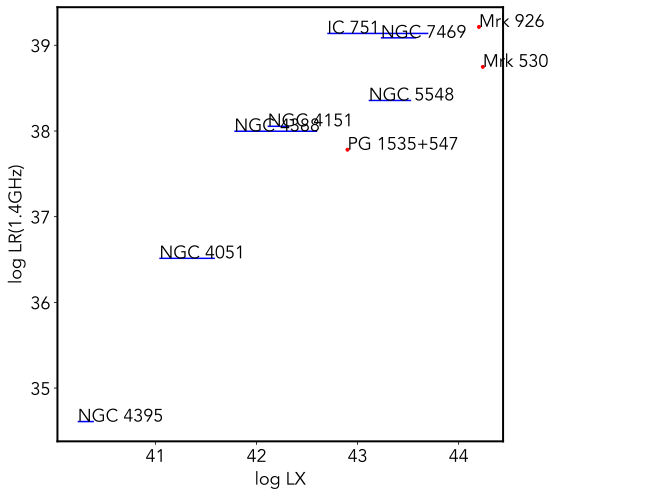

In [98]:
from adjustText import adjust_text

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for i in range(len(FIRST_crossmatch)):
    if not pd.isnull(FIRST_crossmatch.iloc[i]['logLx']):      
        if pd.isnull(FIRST_crossmatch.iloc[i]['logLxmax']):
            ax.scatter(FIRST_crossmatch.iloc[i]['logLx'],np.log10(FIRST_crossmatch.iloc[i]['L_INT'])                ,
            #ec='red',fc="red",
            marker='.',   
            color='red',)
        else:

            ax.hlines(y=np.log10(FIRST_crossmatch.iloc[i]['L_INT']),
                       xmin=FIRST_crossmatch.iloc[i]['logLx'],
                       xmax=FIRST_crossmatch.iloc[i]['logLxmax'],
                       color='blue',
                       #linestyle=':'
                     )          
        ax.text(FIRST_crossmatch.iloc[i]['logLx'],
            np.log10(FIRST_crossmatch.iloc[i]['L_INT']),
            FIRST_crossmatch.iloc[i]['Name                          '])

'''texts = [ax.text(FIRST_crossmatch_select['logLx'][i], np.log10(FIRST_crossmatch_select['L_INT'][i]),
                 FIRST_crossmatch_select['Name                          '][i],fontsize=9,) for i in range(len(FIRST_crossmatch_select))]

adjust_text(texts,ax=ax,#arrowprops=dict(arrowstyle='->', color='red',lw=0.5),
            expand_text=(1.25,1.3),
            expand_points=(1.25,1.3),
            expand_objects=(1.25, 1.3),
            expand_align=(1.25, 1.3),
            autoalign='xy',
           #only_move={'points':'x', 'text':'x'}
           ) #使用adjust_text
'''
        
        
ax.set_xlabel('log LX')
ax.set_ylabel(r'log LR(1.4GHz)')

#ax.set_xlim(0.5,2.5)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
#ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.1, 0.8),ncol=1,loc=2,fontsize=10)

plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/CLAGN_RX.png', 
            dpi=400, transparent=False, bbox_inches='tight')
        
        

# BAT

In [173]:
BAT_105m_Seyfert=pd.read_csv('/Users/brettlv/Downloads/CLAGN_statistic_plot/BAT_105m_Seyfert_data_0.csv')
print(BAT_105m_Seyfert.columns)

Index(['    ', '             BAT_NAME', '     RA', '    DEC', '    SNR',
       '              COUNTERPART_NAME', '                     OTHER_NAME',
       ' CTPT_RA', 'CTPT_DEC', '    FLUX', ' FLUX_LO', ' FLUX_HI', 'CONTA',
       'GAMM', 'GAMM.1', 'GAMM.2', '  CHI_SQ_R', 'REDSHIF', '  LUM',
       'ASSOC_STREN', '        CL2', '                 TYPE',
       'pearson_coeff_neo', 'sigma_m_w1_neo', 'mean_m_w1_neo',
       'sigma_m_w2_neo', 'mean_m_w2_neo', 'len_neo', 'pearson_coeff_mep',
       'sigma_m_w1_mep', 'mean_m_w1_mep', 'sigma_m_w2_mep', 'mean_m_w2_mep',
       'len_mep', 'S_type'],
      dtype='object')


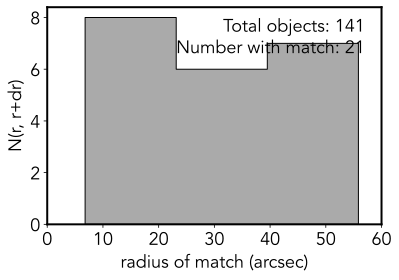

In [174]:
imX = np.empty((len(CLAGN_list_2021_liu_coord), 2), dtype=np.float64)
imX[:, 0] = CLAGN_list_2021_liu_coord.ra.deg
imX[:, 1] = CLAGN_list_2021_liu_coord.dec.deg

stX = np.empty((len(BAT_105m_Seyfert), 2), dtype=np.float64)
stX[:, 0] = pd.to_numeric(BAT_105m_Seyfert['     RA'])
stX[:, 1] = pd.to_numeric(BAT_105m_Seyfert['    DEC'])


# crossmatch catalogs
#max_radius = 1. / 3600  # 1 arcsec
#max_radius = 5  # 1 degree
max_radius = 60. / 3600  # 60 arcsec

dist, ind = crossmatch_angular(stX, imX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (imX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 60)
plt.show()

In [175]:
ind_remove_rep_BAT=[]
for i in ind[match]:
    if i not in ind_remove_rep_BAT:
        ind_remove_rep_BAT.append(i)
        
ind_remove_rep_BAT=np.array(ind_remove_rep_BAT)        
a_BAT=Counter(ind[match])

array([19,  4, 22,  1,  3,  8, 43, 26, 28,  5, 29, 30, 31, 33, 35, 37,  2,
       38, 15, 39, 10])

([<matplotlib.axis.XTick at 0x105f63820>,
 [Text(0, 0, 'NGC 454'),
  Text(1, 0, 'Fairall 9'),
  Text(2, 0, 'NGC 1365'),
  Text(3, 0, '1H 0419-577'),
  Text(4, 0, 'ESO 362-G18'),
  Text(5, 0, 'Mrk 6'),
  Text(6, 0, 'UGC 4203'),
  Text(7, 0, 'NGC 2992'),
  Text(8, 0, 'NGC 3516'),
  Text(9, 0, 'HE 1136-2304'),
  Text(10, 0, 'NGC 4051'),
  Text(11, 0, 'NGC 4151'),
  Text(12, 0, 'NGC 4388'),
  Text(13, 0, 'NGC 4507'),
  Text(14, 0, 'NGC 5548'),
  Text(15, 0, 'NGC 6300'),
  Text(16, 0, '3C 390.3'),
  Text(17, 0, 'NGC 7469'),
  Text(18, 0, 'Mrk 926'),
  Text(19, 0, 'NGC 7582'),
  Text(20, 0, 'Mrk 530')])

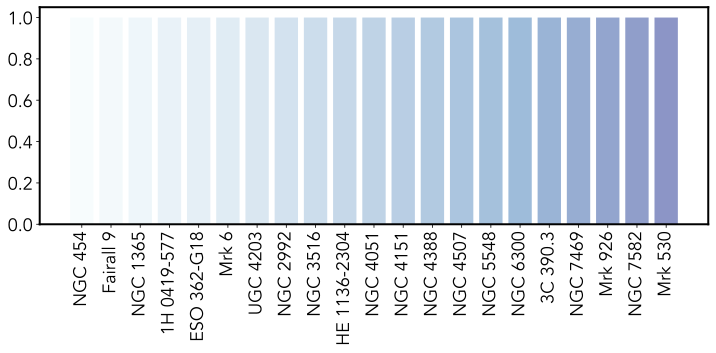

In [179]:
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)

colors = plt.cm.BuPu(np.linspace(0, 0.5, len(ind_remove_rep_BAT)))

for index,i in enumerate(a_BAT):#index 
    plt.bar(index,a_BAT[i],color=colors[index])
    #print(index,i,a[i])
    
plt.xticks(np.arange(len(ind_remove_rep_BAT)),CLAGN_list_2021_liu['Name'][ind_remove_rep_BAT[np.arange(len(ind_remove_rep_BAT))]].str.strip(),rotation=90)


# CLAGN_statistic_2021_liu

In [139]:
CLAGN_statistic_2021_liu=pd.read_excel('/Users/brettlv/blog/IHEP_sync/data/data_clagn/CLAGN_with_RA_Dec_Liuhaov2.xlsx',sheet_name='statistic_paper',header=None)
#CLAGN_list_2021_liu=CLAGN_list_2020[1:]
CLAGN_statistic_2021_liu.columns=['Name','z','type1or2','type','ref1','logM','ref2']
#CLAGN_statistic_2021_liu
namelists_CLAGN_statistic_2021_liu=CLAGN_statistic_2021_liu['Name']

CLAGN_statistic_2021_liu[CLAGN_statistic_2021_liu['Name']=='NGC1068']

print(len(namelists_CLAGN_statistic_2021_liu))
for i in namelists_CLAGN_statistic_2021_liu[:]:
    print(i.replace(' ',''))

# wise

In [7]:
from astroquery.irsa import Irsa
Irsa.list_catalogs()  

{'allwise_p3as_psd': 'AllWISE Source Catalog',
 'allwise_p3as_mep': 'AllWISE Multiepoch Photometry Table',
 'allwise_p3as_psr': 'AllWISE Reject Table',
 'allwise_p3as_cdd': 'AllWISE Atlas Metadata Table',
 'allwise_p3am_xrf': 'AllWISE Frame Cross-Reference Table',
 'allwise_p3al_lod': 'AllWISE Atlas Inventory Table',
 'allwise_p3am_cdd': 'AllWISE Atlas Image Inventory Table',
 'allwise_mfpos': 'AllWISE Refined Pointing Information for the Single-exposure Images',
 'neowiser_p1bs_psd': 'NEOWISE-R Single Exposure (L1b) Source Table',
 'neowiser_p1ba_mch': 'NEOWISE-R Known Solar System Object Possible Association List ( Caution )',
 'neowiser_p1bs_frm': 'NEOWISE-R Single Exposure (L1b) Frame Metadata Table',
 'neowiser_p1bl_lod': 'NEOWISE-R Single Exposure (L1b) Scan Inventory Table',
 'neowiser_p1bm_frm': 'NEOWISE-R Single Exposure (L1b) Image Inventory Table',
 'allsky_4band_p3as_psd': 'WISE All-Sky Source Catalog',
 'allsky_4band_p1bs_psd': 'WISE All-Sky Single Exposure (L1b) Source Ta

In [70]:
import os
import time
from astropy import config as _config
from astroquery.irsa import Irsa    

In [71]:
import astroquery
print(astroquery.__version__)

0.4.3


In [72]:
pwd

'/Users/brettlv/blog/brettlv.github.io/pythoncode/changinglookAGN'

## download

In [ ]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120

for i in namelists_CLAGN_statistic_2021_liu[:]:
    #print(i)
    search_name=i.replace(' ','')
    save_name=i
    print(search_name)
    if not os.path.exists('wise_%s_mep.csv'%i):
        Irsa.ROW_LIMIT = 1000
        Irsa.TIMEOUT = 120
        table_wise_mep=Irsa.query_region(search_name,catalog='allwise_p3as_mep',spatial='Cone',radius=10*u.arcsec,)
        table_wise_mep.write('wise_%s_mep.csv'%i, format='csv')
        time.sleep(15+np.random.randint(5,10))    
    
    if not os.path.exists('wise_%s_neo.csv'%i):
        Irsa.ROW_LIMIT = 1000
        Irsa.TIMEOUT = 120
        
        table_wise_neo=Irsa.query_region(search_name,catalog='neowiser_p1bs_psd',spatial='Cone',radius=10*u.arcsec,)  
        table_wise_neo.write('wise_%s_neo.csv'%i, format='csv')       
        time.sleep(15+np.random.randint(5,10))      


In [8]:
pwd

'/Users/brettlv/blog/brettlv.github.io/pythoncode/changinglookAGN'

## check notdown

In [73]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120

for index,i in enumerate(namelists_CLAGN_statistic_2021_liu):
    save_name=i
    search_name=i.replace(' ','')
    if  not os.path.exists('wise_%s_mep.csv'%i):
        print(index,i)
        print('***mep notdone')
        
      
    if  not os.path.exists('wise_%s_neo.csv'%i):
        print(index,i)
        print('***neo notdone')        
        

## check download

#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120

for index,i in enumerate(namelists_CLAGN_statistic_2021_liu):
    print(index,i)
    search_name=i.replace(' ','')
    if  os.path.exists('wise_%s_mep.csv'%i):
        print('mep done')
    else:
        print('***mep notdone')
        
      
    if  os.path.exists('wise_%s_neo.csv'%i):
        print('neo done')    
    else:
        print('***neo notdone')        
        

# excess_variance

<span style="font-size:larger;">
$$\sigma_{rms}^2=\frac{1}{N\mu^2}\sum_{i=1}^{N}[(X_i-\mu)^2-\sigma_i^2]\\$$
</span>  



<span style="font-size:larger;">
    error on $\sigma_{rms}^2$
</span>  


<span style="font-size:larger;">
    
$$error_{\sigma_{rms}^2}=s_D/(\mu^2\sqrt{N})$$

</span>  

<span style="font-size:larger;">

$$s_D^2=\frac{1}{N-1}\sum_{i=1}^{N}\{[(X_i-\mu)^2-\sigma_i^2]-\sigma_{rms}^2\mu^2\}^2$$

</span> 

In [140]:
def get_excess_variance(data,flux_label,fluxerr_label):

    mu=np.average(data[flux_label])
    mu_err=np.average(data[fluxerr_label])  
    len_flux=len(data[flux_label])

    sigma_rms_sqr2=np.sum((data[flux_label]-mu)**2-data[fluxerr_label]**2)/len_flux/mu**2
    
    sd_sqr2_err=np.sum(((data[flux_label]-mu)**2-data[fluxerr_label]**2-sigma_rms_sqr2*mu**2)**2)/(len_flux-1)
    sigma2_err=sd_sqr2_err**0.5/(mu**2*len_flux**0.5)
    
    sigma_rms=sigma_rms_sqr2**0.5
    sigma_rms_err=sigma2_err*0.5*sigma_rms_sqr2**-0.5
    
    return mu,mu_err,sigma_rms_sqr2,sigma2_err,sigma_rms,sigma_rms_err

mu,mu_err,sigma_rms_sqr2,sigma2_err,sigma_rms,sigma_rms_err=  get_excess_variance(df_157_src1000_large3,'int_flux','err_int_flux')  

## intrinsic amplitude of variability

In [ ]:
intrinsic amplitude of variability (σm)

<span style="font-size:larger;">
$$\Sigma=\sqrt{\frac{1}{N-1}\sum_{i=1}^{N}(m_i-<m>)^2\\}$$
</span>  

$$\sigma_m = \begin{cases}
\sqrt{\Sigma^{2}-\epsilon^2} ,& \, \Sigma > \epsilon \\
0 , & otherwise
\end{cases}$$


$$\epsilon^2=\frac{1}{N}\sum_{i=1}^{N}\epsilon_i^2+\epsilon_s^2$$

$$\sigma_{m\, restframe}=\sigma_m \times \sqrt{(1+z)}$$

In [141]:
def get_intrinsic_var(data,mag_label,magerr_label,epsilon_s):
    mag_mean=np.average(data[mag_label])
    length_N=len(data[mag_label])
    epsilon_square=np.average(data[magerr_label]**2)+epsilon_s**2
    Sigma_square=np.sum((data[mag_label]-mag_mean)**2)/(length_N-1)
    
    if Sigma_square>epsilon_square:
        sigma_m=np.sqrt(Sigma_square-epsilon_square)
    else:
        sigma_m=0
        
    if length_N<2:
        sigma_m=-1#print(length_N)
    return sigma_m

In [104]:
namelists_CLAGN_statistic_2021_liu[0]

'1ES 1927+654 '

## data_test

In [77]:
CLAGN_statistic_2021_liu['Name'][0]

'1ES 1927+654 '

In [79]:
index_test=0
print(CLAGN_statistic_2021_liu['Name'][index_test])
data_test=pd.read_csv('wise_%s_neo.csv'%CLAGN_statistic_2021_liu['Name'][index_test])

data_test=data_test[data_test['w1mpro'].notnull()]
data_test=data_test[data_test['w2mpro'].notnull()]
data_test=data_test[data_test['w1sigmpro'].notnull()]
data_test=data_test[data_test['w2sigmpro'].notnull()]
data_test=data_test[data_test['qual_frame']>5]

data_test=(data_test.loc[:, ['mjd', 'w1mpro','w2mpro',
                           'w1sigmpro','w2sigmpro',                    
                           ]].sort_values('mjd'))

data_test=data_test.reset_index(drop=True)

1ES 1927+654 


In [80]:
data_test.columns

Index(['mjd', 'w1mpro', 'w2mpro', 'w1sigmpro', 'w2sigmpro'], dtype='object')

In [81]:
data_test

mjd  w1mpro  w2mpro  w1sigmpro  w2sigmpro
0   56650.975715  13.164  13.306      0.040      0.088
1   57196.543704  13.388  13.418      0.035      0.091
2   57563.576199  15.108  14.511      0.140      0.231
3   57732.913390  13.516  14.116      0.045      0.268
4   58095.781492  13.498  12.276      0.040      0.053
5   58293.762257  13.120  13.218      0.036      0.090
6   58295.856196  13.278  13.033      0.038      0.070
7   58454.537761  13.349  13.342      0.038      0.130
8   58657.810118  13.472  10.833      0.041      0.030
9   58658.071797  13.814  14.071      0.064      0.332
10  58660.688715  12.567  14.198      0.031      0.210
11  58662.651245  13.421  13.842      0.044      0.178
12  58818.008482  13.397  13.359      0.036      0.083
13  59027.231114  15.076  14.746      0.131      0.470
14  59185.412923  13.731  10.616      0.058      0.023

data_test=data_test.fillna(0)

In [18]:
and took the values of the W1 magnitude w1mpro ep, W1 magnitude error
w1sigmpro ep, W2 magnitude w2mpro ep, W2 magnitude error
w2sigmpro ep, and MJD mjd. T

len(namelists_CLAGN_statistic_2021_liu[:])

for index,i in enumerate(namelists_CLAGN_statistic_2021_liu[:]):
    print(i)

In [82]:
CLAGN_statistic_2021_liu.columns

Index(['Name', 'z', 'type1or2', 'type', 'ref1', 'logM', 'ref2'], dtype='object')

## neo

In [144]:
epsilon_s_w1=0.024
epsilon_s_w2=0.028
#CLAGN_statistic_2021_liu['sigma_m_w1_neo']=-1
#CLAGN_statistic_2021_liu['sigma_m_w2_neo']=-1
for index,i in enumerate(namelists_CLAGN_statistic_2021_liu[:]):
    data=pd.read_csv('wise_%s_neo.csv'%i)    
    data=data[data['w1mpro'].notnull()]
    data=data[data['w2mpro'].notnull()]
    data=data[data['w1sigmpro'].notnull()]
    data=data[data['w2sigmpro'].notnull()]
    data=data[data['qual_frame']>5]
    
    data=(data.loc[:, ['mjd', 'w1mpro','w2mpro',
                           'w1sigmpro','w2sigmpro',                    
                           ]].sort_values('mjd'))

    data=data.reset_index(drop=True)
    #data=data.fillna(0)
    if len(data)>2:
        mag_label='w1mpro'
        magerr_label='w1sigmpro'
        epsilon_s=epsilon_s_w1
        
        pearson_coeff,p_value=pearsonr(data['w1mpro'],data['w2mpro'])
        CLAGN_statistic_2021_liu.loc[index,'pearson_coeff_neo']=pearson_coeff
        
        sigma_m_w1=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        CLAGN_statistic_2021_liu.loc[index,'sigma_m_w1_neo']=sigma_m_w1
        CLAGN_statistic_2021_liu.loc[index,'mean_m_w1_neo']=np.average(data[mag_label])
        

        mag_label='w2mpro'
        magerr_label='w2sigmpro'
        epsilon_s=epsilon_s_w2
        sigma_m_w2=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        CLAGN_statistic_2021_liu.loc[index,'sigma_m_w2_neo']=sigma_m_w2
        CLAGN_statistic_2021_liu.loc[index,'mean_m_w2_neo']=np.average(data[mag_label])
        
        CLAGN_statistic_2021_liu.loc[index,'len_neo']=len(data)
    else:
        CLAGN_statistic_2021_liu.loc[index,'len_neo']=0
        #print(index,i)

## mep

In [96]:
b'0000'.decode('utf-8')=='0000'

True

In [145]:
epsilon_s_w1=0.024
epsilon_s_w2=0.028
#CLAGN_statistic_2021_liu['sigma_m_w1_mep']=-1
#CLAGN_statistic_2021_liu['sigma_m_w2_mep']=-1

for index,i in enumerate(namelists_CLAGN_statistic_2021_liu[:]):
    #print(index,i)
    data=pd.read_csv('wise_%s_mep.csv'%i)
    data=data[data['w1mpro_ep'].notnull()]
    data=data[data['w2mpro_ep'].notnull()]
    data=data[data['w1sigmpro_ep'].notnull()]
    data=data[data['w2sigmpro_ep'].notnull()]
    data=data[data['qi_fact']>0]
    data=data[data['saa_sep']>0]
    #data=data[data['moon_masked'].str.decode('utf-8')=='0000']
    
    #print(len(data))
    data=(data.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                           'w1sigmpro_ep','w2sigmpro_ep',                    
                           ]].sort_values('mjd'))
    
    data=data.reset_index(drop=True)
    #data=data.fillna(0)
    
    if len(data)>2:
        mag_label='w1mpro_ep'
        magerr_label='w1sigmpro_ep'
        epsilon_s=epsilon_s_w1
        
        pearson_coeff,p_value=pearsonr(data['w1mpro_ep'],data['w2mpro_ep'])
        CLAGN_statistic_2021_liu.loc[index,'pearson_coeff_mep']=pearson_coeff
        
        sigma_m_w1=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        CLAGN_statistic_2021_liu.loc[index,'sigma_m_w1_mep']=sigma_m_w1
        CLAGN_statistic_2021_liu.loc[index,'mean_m_w1_mep']=np.average(data[mag_label])
        

        mag_label='w2mpro_ep'
        magerr_label='w2sigmpro_ep'
        epsilon_s=epsilon_s_w2
        sigma_m_w2=get_intrinsic_var(data,mag_label,magerr_label,epsilon_s)
        CLAGN_statistic_2021_liu.loc[index,'sigma_m_w2_mep']=sigma_m_w2
        CLAGN_statistic_2021_liu.loc[index,'mean_m_w2_mep']=np.average(data[mag_label])
        
        CLAGN_statistic_2021_liu.loc[index,'len_mep']=len(data)
    else:
        CLAGN_statistic_2021_liu.loc[index,'len_mep']=0
        #print(index,i)

CLAGN_statistic_2021_liu=CLAGN_statistic_2021_liu.drop('sigma_m_ww',1)

In [146]:
CLAGN_statistic_2021_liu

Name      z     type1or2 type  ref1  logM  \
0                1ES 1927+654   0.017          NaN   A     -1   7.3   
1                 1H 0419-577   0.104  Seyfert 1.5   B     -3  8.58   
2                    3C 390.3   0.056          NaN   A     -5    -    
3                 ESO 362-G18   0.012          NaN   A     -6  7.65   
4                   Fairall 9   0.046          NaN   A     -5  8.41   
..                         ...    ...          ...  ...   ...   ...   
136  SDSS J224448.72+004347.1   0.637          NaN   A    -62   7.8   
137  SDSS J225240.37+010958.7   0.533          NaN   A    -50   8.2   
138  SDSS J233317.38-002303.4   0.513          NaN   A    -52   8.3   
139  SDSS J233602.98+001728.7   0.243          NaN   A    -52  8.26   
140  SDSS J235107.43-091318.0   0.354          NaN   A    -50   7.9   

           ref2  pearson_coeff_neo  sigma_m_w1_neo  mean_m_w1_neo  \
0      (2)   \\           0.279816        0.668499      13.593267   
1      (4)   \\           0.518767        0.015590      10.875025   
2         -  \\           0.971872        0.219951       9.912729   
3      (7)   \\           0.320990        0.204220       9.889058   
4      (8)   \\           0.825841        0.049800       9.002435   
..          ...                ...             ...            ...   
136   (62)   \\          -0.107988        0.122760      15.445254   
137   (51)   \\          -0.015997        0.099401      15.000580   
138   (51)   \\           0.494413        0.167835      14.712864   
139   (54)   \\           0.011452        0.129963      15.562258   
140   (51)   \\           0.142503        0.123276      14.783417   

     sigma_m_w2_neo  mean_m_w2_neo  len_neo  pearson_coeff_mep  \
0          1.188263      13.259000     15.0           0.830479   
1          0.000000       9.860228    439.0           0.166338   
2          0.222340       8.864215    483.0           0.636645   
3          0.094115       9.276938    243.0           0.854126   
4          0.020625       7.994382    170.0          -0.111975   
..              ...            ...      ...                ...   
136        0.000000      14.894016     63.0          -0.034800   
137        0.000000      14.268366    112.0          -0.209917   
138        0.232635      13.820174    132.0           0.164854   
139        0.000000      14.862645     93.0          -0.373220   
140        0.000000      14.310278    144.0           0.261236   

     sigma_m_w1_mep  mean_m_w1_mep  sigma_m_w2_mep  mean_m_w2_mep  len_mep  
0          0.299988      13.267015        0.281017      13.195559     68.0  
1          0.016404      10.830919        0.035198       9.808713    136.0  
2          0.055103       9.642274        0.028625       8.601649    168.0  
3          0.072953       9.870192        0.066163       9.177962     26.0  
4          0.000000       9.065000        0.000000       7.995226     31.0  
..              ...            ...             ...            ...      ...  
136        0.047557      15.438250        0.000000      14.889250     16.0  
137        0.031295      14.387842        0.000000      13.550474     19.0  
138        0.000000      14.417875        0.010180      13.517667     24.0  
139        0.108926      15.730187        0.000000      14.993375     16.0  
140        0.000000      14.819350        0.000000      14.359550     20.0  

[141 rows x 19 columns]

# LLAGN

In [108]:
LLAGN=pd.read_csv('/Users/brettlv/Downloads/CLAGN_statistic_plot/LLAGN.csv')

In [109]:
LLAGN.columns

Index(['Name', 'lg(L2-10keV)', 'Sigma_dis', 'lg(MBH/Msun)', 'lg(LEdd)',
       'lg(Lbol)', 'lg(Lbol/LEdd)', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'sigma_m_w1_neo', 'mean_m_w1_neo', 'sigma_m_w2_neo', 'mean_m_w2_neo'],
      dtype='object')

In [186]:
LLAGN[LLAGN['sigma_m_w1_neo']>0.5]

Name  lg(L2-10keV)  Sigma_dis  lg(MBH/Msun)   lg(LEdd)   lg(Lbol)  \
5    NGC 221         35.85       65.4      6.178482  44.292425  37.048657   
6    NGC 224         35.85      153.9      7.672559  45.786502  37.048657   
21  NGC 1068         43.63      161.8      7.759953  45.873896  44.828657   

    lg(Lbol/LEdd)  Unnamed: 7  Unnamed: 8  Unnamed: 9  sigma_m_w1_neo  \
5       -7.243768         NaN         NaN         NaN        0.542274   
6       -8.737845         NaN         NaN         NaN        1.243478   
21      -1.045239         NaN         NaN         NaN        1.064303   

    mean_m_w1_neo  sigma_m_w2_neo  mean_m_w2_neo  
5        5.965767        0.071041       6.655907  
6        5.017857        0.124788       6.837526  
21       4.016636        1.172188       2.069903

NGC 1068
46
Index(['mjd', 'w1mpro', 'w2mpro', 'w1sigmpro', 'w2sigmpro'], dtype='object')
30
Index(['mjd', 'w1mpro_ep', 'w2mpro_ep', 'w1sigmpro_ep', 'w2sigmpro_ep'], dtype='object')


Text(0.05, 0.9, 'NGC 1068')

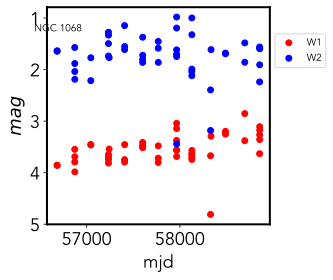

In [216]:
index_test=21
name_test=LLAGN['Name'][index_test]
print(name_test)
search_name=name_test.replace(' ','') 
save_name=name_test

data_test_neo=pd.read_csv('./wise_data_search/LLAGN/wise_%s_neo.csv'%save_name)
data_test_neo=data_test_neo[data_test_neo['w1mpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w2mpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w1sigmpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w2sigmpro'].notnull()]
#data_test_neo=data_test_neo[data_test_neo['w1mpro']<15]
#data_test_neo=data_test_neo[data_test_neo['w2mpro']<13]
data_test_neo=data_test_neo[data_test_neo['w1rchi2']<2]
#data_test_neo=data_test_neo[data_test_neo['w2rchi2']<2]

data_test_neo=data_test_neo[data_test_neo['qual_frame']>0]
print(len(data_test_neo))
data_test_neo=(data_test_neo.loc[:, ['mjd', 'w1mpro','w2mpro',
                             'w1sigmpro','w2sigmpro',
                             ]].sort_values('mjd'))

data_test_neo=data_test_neo.reset_index(drop=True)
print(data_test_neo.columns)

data_test_mep=pd.read_csv('./wise_data_search/LLAGN/wise_%s_mep.csv'%save_name)
data_test_mep=data_test_mep[data_test_mep['w1mpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w2mpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w1sigmpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w2sigmpro_ep'].notnull()]
#data_test_mep=data_test_mep[data_test_mep['qual_frame']>5]
data_test_mep=data_test_mep[data_test_mep['qi_fact']>0]
data_test_mep=data_test_mep[data_test_mep['saa_sep']>0]
    
print(len(data_test_mep))
data_test_mep=(data_test_mep.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                                     'w1sigmpro_ep','w2sigmpro_ep',
                                     ]].sort_values('mjd'))

data_test_mep=data_test_mep.reset_index(drop=True)
print(data_test_mep.columns)


fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

ax.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')


#ax.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')
#ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.9),ncol=1,
      loc=2,fontsize=10)

bottom, top = plt.ylim() 
plt.ylim(top,bottom)

plt.xlabel('mjd')
plt.ylabel(r'$mag$')
#plt.xlim(57365,58530)
ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)


NGC 221
0
Index(['mjd', 'w1mpro', 'w2mpro', 'w1sigmpro', 'w2sigmpro'], dtype='object')
48
Index(['mjd', 'w1mpro_ep', 'w2mpro_ep', 'w1sigmpro_ep', 'w2sigmpro_ep'], dtype='object')


Text(0.05, 0.9, 'NGC 221')

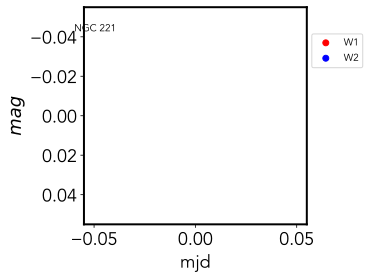

In [221]:
index_test=5
name_test=LLAGN['Name'][index_test]
print(name_test)
search_name=name_test.replace(' ','') 
save_name=name_test

data_test_neo=pd.read_csv('./wise_data_search/LLAGN/wise_%s_neo.csv'%save_name)
data_test_neo=data_test_neo[data_test_neo['w1mpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w2mpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w1sigmpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w2sigmpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w1mpro']<15]
data_test_neo=data_test_neo[data_test_neo['w2mpro']<13]

#data_test_neo=data_test_neo[data_test_neo['w1snr']>10]
#data_test_neo=data_test_neo[data_test_neo['w2snr']>10]

data_test_neo=data_test_neo[data_test_neo['w1rchi2']<15]
#data_test_neo=data_test_neo[data_test_neo['w2rchi2']<5]
    
data_test_neo=data_test_neo[data_test_neo['qual_frame']>5]
print(len(data_test_neo))
data_test_neo=(data_test_neo.loc[:, ['mjd', 'w1mpro','w2mpro',
                             'w1sigmpro','w2sigmpro',
                             ]].sort_values('mjd'))

data_test_neo=data_test_neo.reset_index(drop=True)
print(data_test_neo.columns)

data_test_mep=pd.read_csv('./wise_data_search/LLAGN/wise_%s_mep.csv'%save_name)
data_test_mep=data_test_mep[data_test_mep['w1mpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w2mpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w1sigmpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w2sigmpro_ep'].notnull()]
#data_test_mep=data_test_mep[data_test_mep['qual_frame']>5]
data_test_mep=data_test_mep[data_test_mep['qi_fact']>0]
data_test_mep=data_test_mep[data_test_mep['saa_sep']>0]
    
print(len(data_test_mep))
data_test_mep=(data_test_mep.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                                     'w1sigmpro_ep','w2sigmpro_ep',
                                     ]].sort_values('mjd'))

data_test_mep=data_test_mep.reset_index(drop=True)
print(data_test_mep.columns)


fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

ax.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')


#ax.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')
#ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.9),ncol=1,
      loc=2,fontsize=10)

bottom, top = plt.ylim() 
plt.ylim(top,bottom)

plt.xlabel('mjd')
plt.ylabel(r'$mag$')
#plt.xlim(57365,58530)
ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)


NGC 224
2
Index(['mjd', 'w1mpro', 'w2mpro', 'w1sigmpro', 'w2sigmpro'], dtype='object')
45
Index(['mjd', 'w1mpro_ep', 'w2mpro_ep', 'w1sigmpro_ep', 'w2sigmpro_ep'], dtype='object')


Text(0.05, 0.9, 'NGC 224')

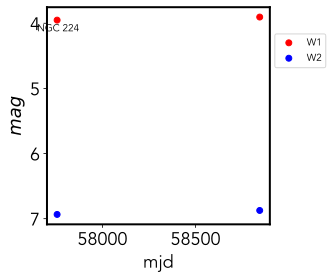

In [219]:
index_test=6
name_test=LLAGN['Name'][index_test]
print(name_test)
search_name=name_test.replace(' ','') 
save_name=name_test

data_test_neo=pd.read_csv('./wise_data_search/LLAGN/wise_%s_neo.csv'%save_name)
data_test_neo=data_test_neo[data_test_neo['w1mpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w2mpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w1sigmpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w2sigmpro'].notnull()]

data_test_neo=data_test_neo[data_test_neo['w1mpro']<15]
data_test_neo=data_test_neo[data_test_neo['w2mpro']<13]

data_test_neo=data_test_neo[data_test_neo['w1rchi2']<10]
#data_test_neo=data_test_neo[data_test_neo['w2rchi2']<2]

data_test_neo=data_test_neo[data_test_neo['qual_frame']>5]
print(len(data_test_neo))
data_test_neo=(data_test_neo.loc[:, ['mjd', 'w1mpro','w2mpro',
                             'w1sigmpro','w2sigmpro',
                             ]].sort_values('mjd'))

data_test_neo=data_test_neo.reset_index(drop=True)
print(data_test_neo.columns)

data_test_mep=pd.read_csv('./wise_data_search/LLAGN/wise_%s_mep.csv'%save_name)
data_test_mep=data_test_mep[data_test_mep['w1mpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w2mpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w1sigmpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w2sigmpro_ep'].notnull()]
#data_test_mep=data_test_mep[data_test_mep['qual_frame']>5]
data_test_mep=data_test_mep[data_test_mep['qi_fact']>0]
data_test_mep=data_test_mep[data_test_mep['saa_sep']>0]
    
print(len(data_test_mep))
data_test_mep=(data_test_mep.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                                     'w1sigmpro_ep','w2sigmpro_ep',
                                     ]].sort_values('mjd'))

data_test_mep=data_test_mep.reset_index(drop=True)
print(data_test_mep.columns)


fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

ax.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')


#ax.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')
#ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.9),ncol=1,
      loc=2,fontsize=10)

bottom, top = plt.ylim() 
plt.ylim(top,bottom)

plt.xlabel('mjd')
plt.ylabel(r'$mag$')
#plt.xlim(57365,58530)
ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)


In [ ]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)
ax.hist(LLAGN['REDSHIF'],bins=150)
#set_ax_locator(ax,)
set_ax_tick(ax)
plt.xlim(0,1.0)

# high_variable_CLAGN_wise

In [150]:
high_variable3_CLAGN_wise=CLAGN_statistic_2021_liu[CLAGN_statistic_2021_liu['sigma_m_w1_neo']>0.3]
high_variable3_CLAGN_wise=drop_index(high_variable3_CLAGN_wise)

In [152]:
high_variable3_CLAGN_wise.columns

Index(['Name', 'z', 'type1or2', 'type', 'ref1', 'logM', 'ref2',
       'pearson_coeff_neo', 'sigma_m_w1_neo', 'mean_m_w1_neo',
       'sigma_m_w2_neo', 'mean_m_w2_neo', 'len_neo', 'pearson_coeff_mep',
       'sigma_m_w1_mep', 'mean_m_w1_mep', 'sigma_m_w2_mep', 'mean_m_w2_mep',
       'len_mep'],
      dtype='object')

In [162]:
high_variable13_CLAGN_wise=CLAGN_statistic_2021_liu[CLAGN_statistic_2021_liu['sigma_m_w1_neo']>0.1]
high_variable13_CLAGN_wise=high_variable13_CLAGN_wise[high_variable13_CLAGN_wise['sigma_m_w1_neo']<=0.3]
high_variable13_CLAGN_wise=drop_index(high_variable13_CLAGN_wise)

In [ ]:
len(high_variable3_CLAGN_wise),len(high_variable13_CLAGN_wise)

## CLAGN_BAT_lightcurve

NGC 454 
Fairall 9 
NGC 1365 
1H 0419-577 
ESO 362-G18 
Mrk 6 
UGC 4203 
NGC 2992 
NGC 3516 
HE 1136-2304 
NGC 4051 
NGC 4151 
NGC 4388 
NGC 4507 
NGC 5548 
NGC 6300 
3C 390.3 
NGC 7469 
Mrk 926 
NGC 7582 
Mrk 530 


<ipython-input-203-00b77134eafb>:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,4))


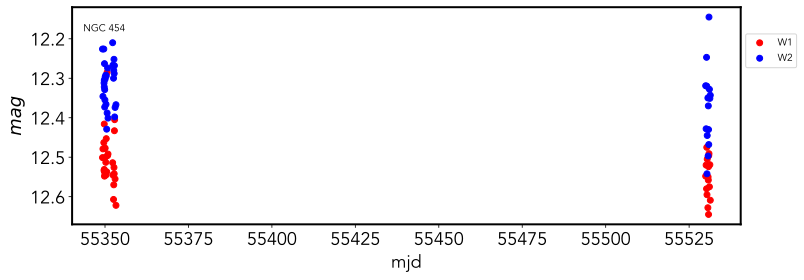

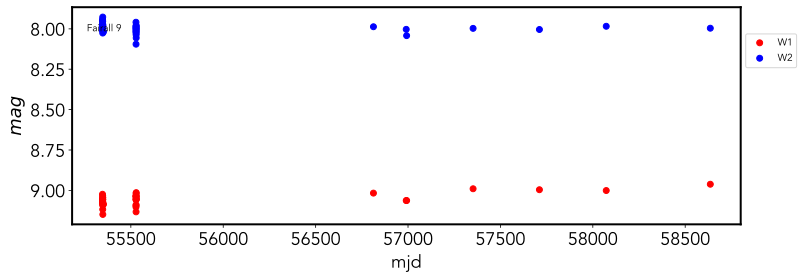

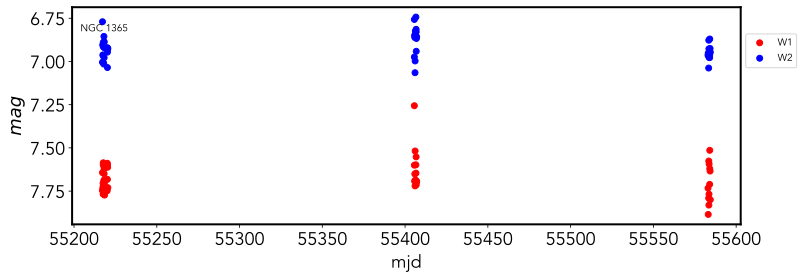

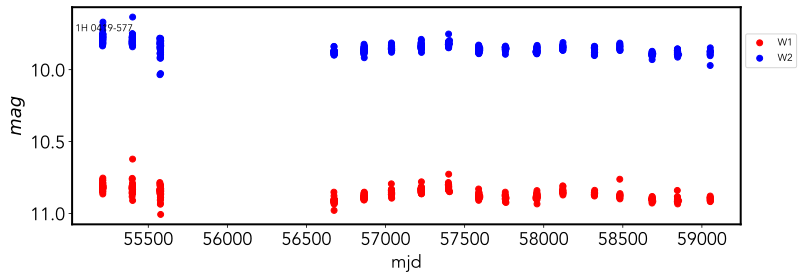

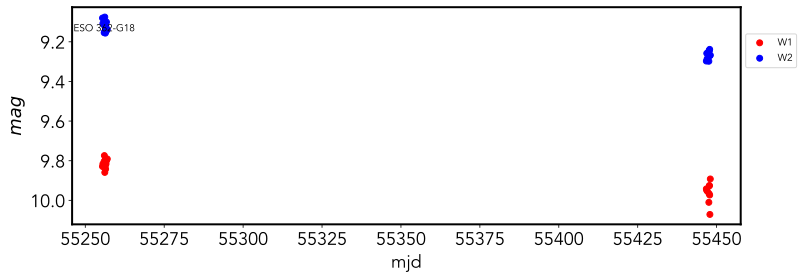

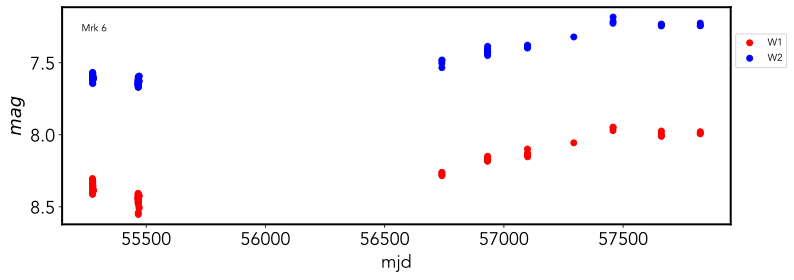

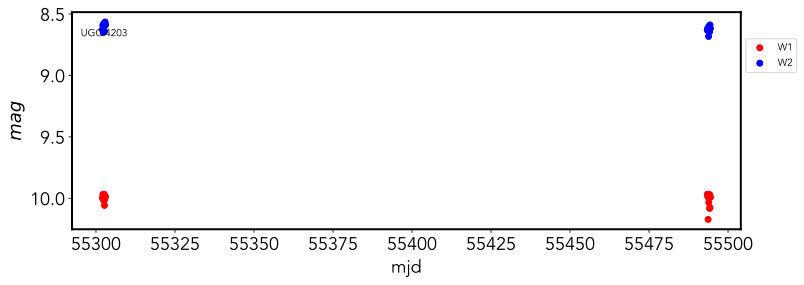

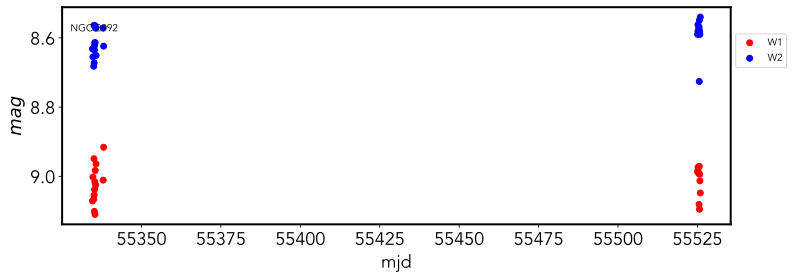

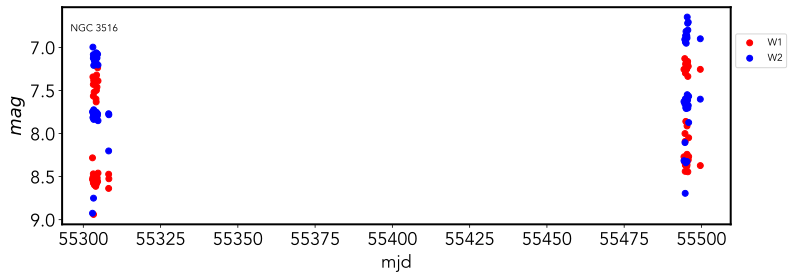

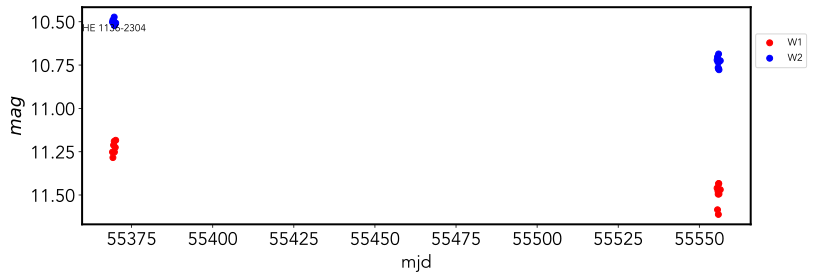

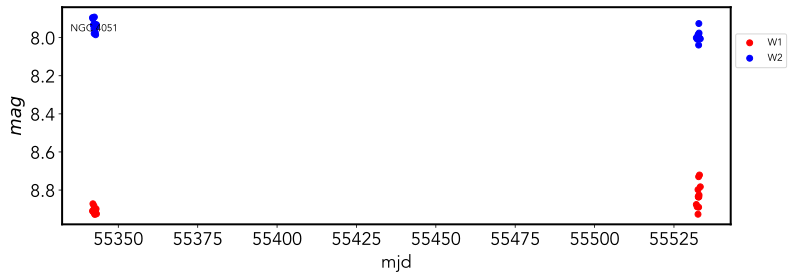

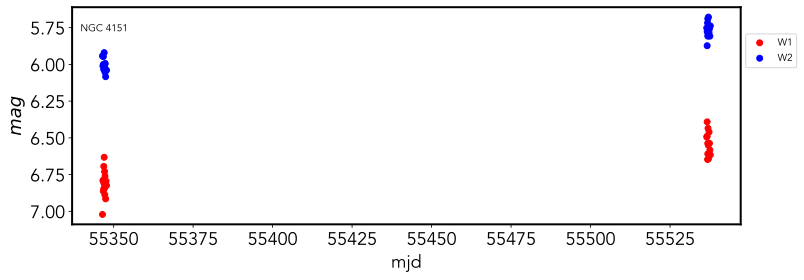

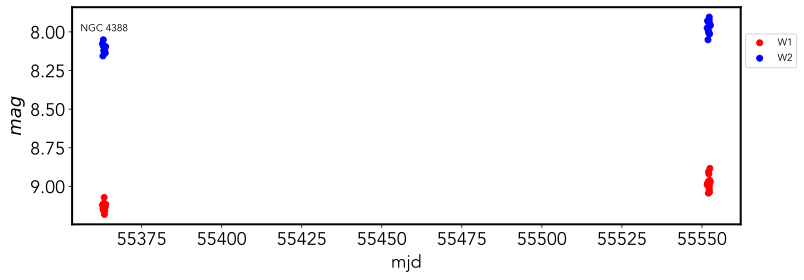

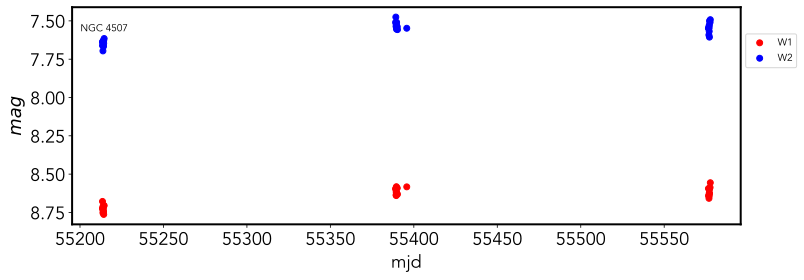

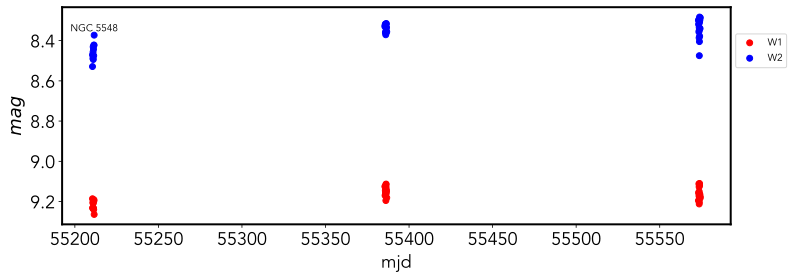

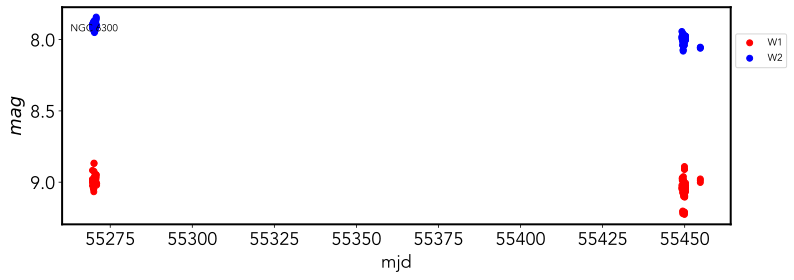

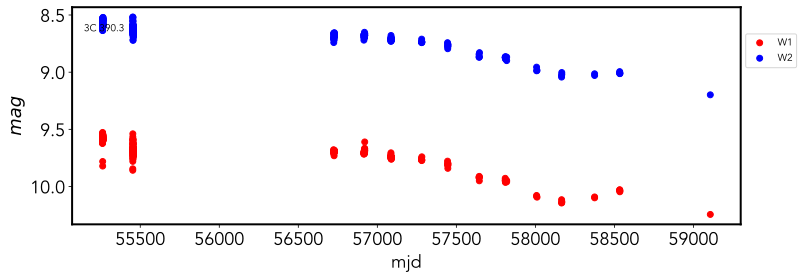

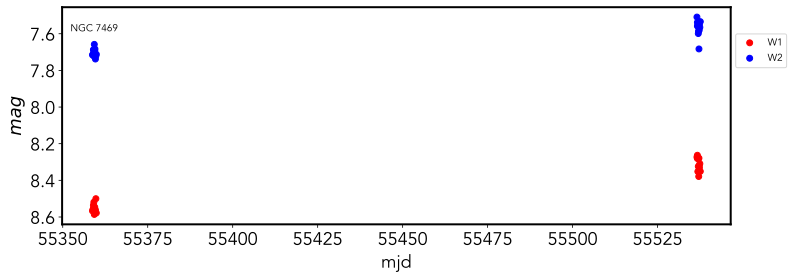

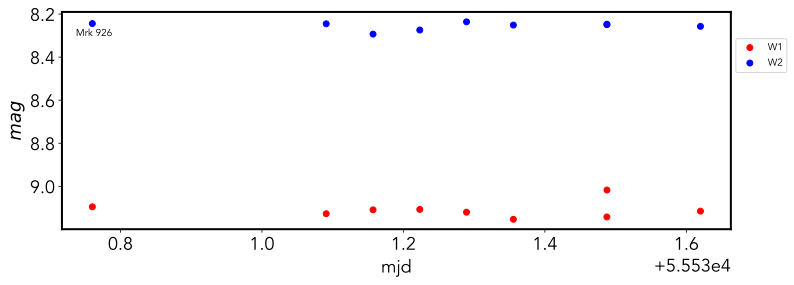

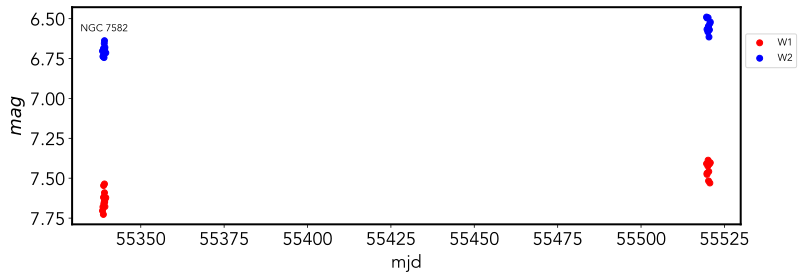

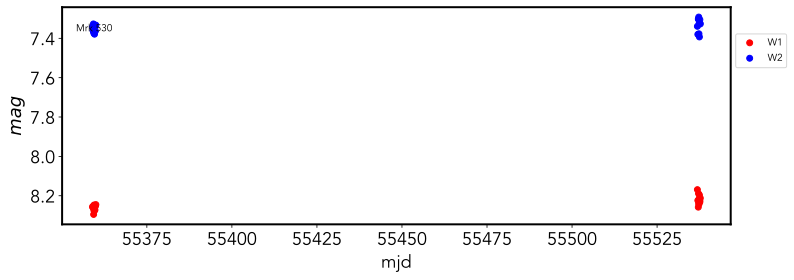

In [203]:
for index_test in ind_remove_rep_BAT:
    name_test=CLAGN_statistic_2021_liu['Name'][index_test]
    print(name_test)
    search_name=name_test.replace(' ','') 
    save_name=name_test

    data_test_neo=pd.read_csv('wise_%s_neo.csv'%save_name)
    data_test_neo=data_test_neo[data_test_neo['w1mpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w2mpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w1sigmpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w2sigmpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w1mpro']<15]
    data_test_neo=data_test_neo[data_test_neo['w2mpro']<13]  
    data_test_neo=data_test_neo[data_test_neo['w1rchi2']<2]
    data_test_neo=data_test_neo[data_test_neo['w2rchi2']<2]
    
    data_test_neo=data_test_neo[data_test_neo['qual_frame']>5]
    #print(len(data_test_neo))
    data_test_neo=(data_test_neo.loc[:, ['mjd', 'w1mpro','w2mpro',
                                 'w1sigmpro','w2sigmpro',
                                 ]].sort_values('mjd'))

    data_test_neo=data_test_neo.reset_index(drop=True)
    #print(data_test_neo.columns)

    data_test_mep=pd.read_csv('wise_%s_mep.csv'%save_name)
    data_test_mep=data_test_mep[data_test_mep['w1mpro_ep'].notnull()]
    data_test_mep=data_test_mep[data_test_mep['w2mpro_ep'].notnull()]
    data_test_mep=data_test_mep[data_test_mep['w1sigmpro_ep'].notnull()]
    data_test_mep=data_test_mep[data_test_mep['w2sigmpro_ep'].notnull()]
    #data_test_mep=data_test_mep[data_test_mep['qual_frame']>5]
    data_test_mep=data_test_mep[data_test_mep['qi_fact']>0]
    data_test_mep=data_test_mep[data_test_mep['saa_sep']>0]

    #print(len(data_test_mep))
    data_test_mep=(data_test_mep.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                                         'w1sigmpro_ep','w2sigmpro_ep',
                                         ]].sort_values('mjd'))

    data_test_mep=data_test_mep.reset_index(drop=True)
    #print(data_test_mep.columns)
    
    fig = plt.figure(figsize=(12,4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)

    ax.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
    ax.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')

    
    ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
    ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.9),ncol=1,
          loc=2,fontsize=10)
    
    bottom, top = plt.ylim() 
    plt.ylim(top,bottom)
    
    plt.xlabel('mjd')
    plt.ylabel(r'$mag$')
    
    ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
    plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/CLAGN_BAT/WISE_CLAGN_lc_with_BAT_%s.png'%save_name, 
            dpi=400, transparent=False, bbox_inches='tight')
    #plt.semilogy()    



## CLAGN_lc

1ES 1927+654 
1H 0419-577 
3C 390.3 
ESO 362-G18 
Fairall 9 
HE 1136-2304 
IC 751 
IRAS 23226-3843 
Mrk 6 
Mrk 372 
Mrk 530 
Mrk 590 
Mrk 609 
Mrk 728 
Mrk 883 
Mrk 926 
Mrk 993 
Mrk 1018 
Mrk 1494 
NGC 454 
NGC 1097 


<ipython-input-224-5836c69c410c>:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,4))


NGC 1346 
NGC 1365 
NGC 1566 
NGC 2617 
NGC 2622 
NGC 2992 
NGC 3065 
NGC 3516 
NGC 4051 
NGC 4151 
NGC 4388 
NGC 4395 
NGC 4507 
NGC 4939 
NGC 5548 
NGC 5683 
NGC 6300 
NGC 7469 
NGC 7582 
NGC 7674 
PG 1535+547 
UGC 3223 
UGC 4203 
WISEA J000236.24-002724.6 
WISEA J000904.54-103428.6 
SDSS J002311.06+003517.5 
WISEA J004339.35+134436.3 
2MASS J01264811-0839481 
WISEA J013458.36-091435.4 
SDSS J015957.62+003310.5 
SDSS J022556.07+003026.7 
SDSS J022652.24-003916.5 
SDSS J030510.60-010431.6 
WISEA J035301.02-062326.2 
2MASS J07451198+3809114 
SDSS J080020.98+263648.8 
SDSS J081319.34+460849.5 
SDSS J081726.41+101210.1 
SDSS J082323.89+422048.3 
2MASX J08284278+5444333 
SDSS J082942.67+415436.9 
WISEA J083132.25+364617.0 
WISEA J084748.28+182440.0 
WISEA J084957.78+274728.8 
SDSS J090902.35+133019.4 
WISEA J090932.02+474730.7 
SDSS J091531.04+481407.7 
2MASS J09270231+0433080 
WISEA J093730.32+260232.1 
2MASX J09381221+0743398 
SDSS J094810.92+005057.8 
2MASX J09483841+4030436 
2MASS J10

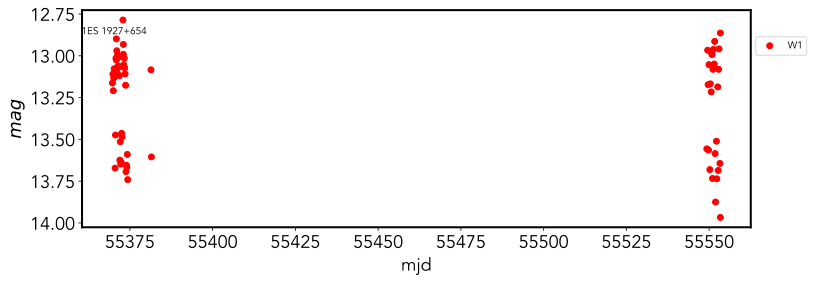

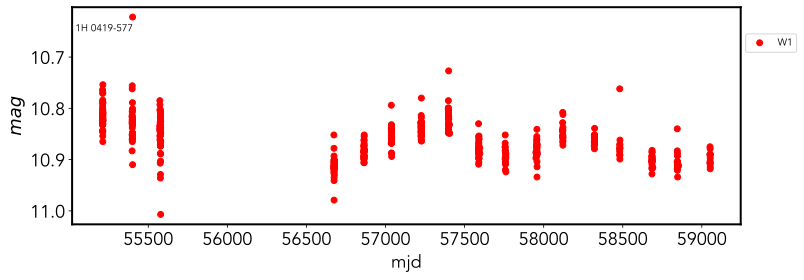

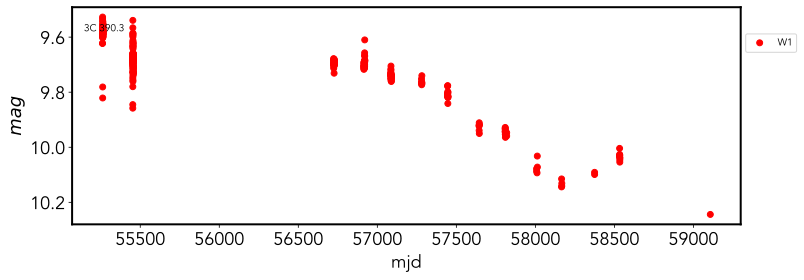

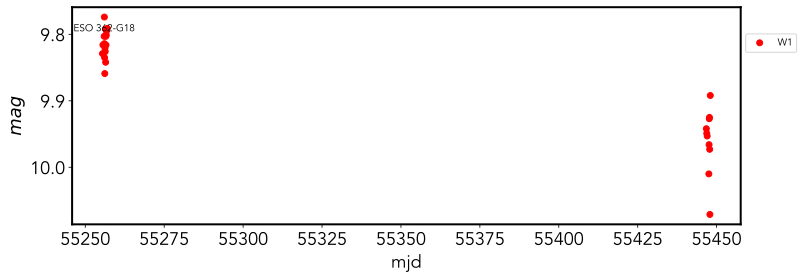

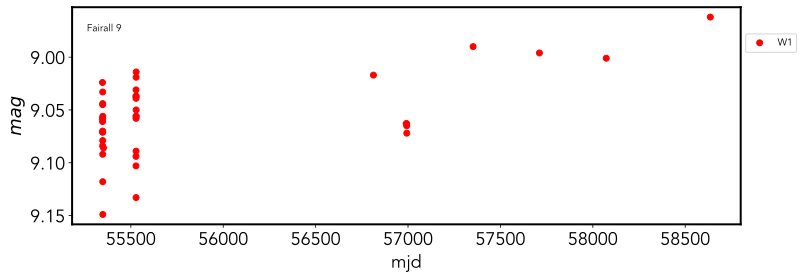

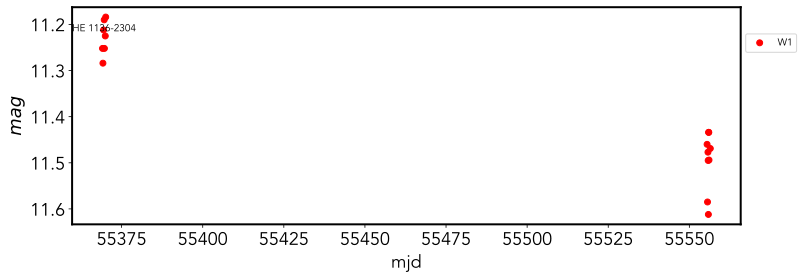

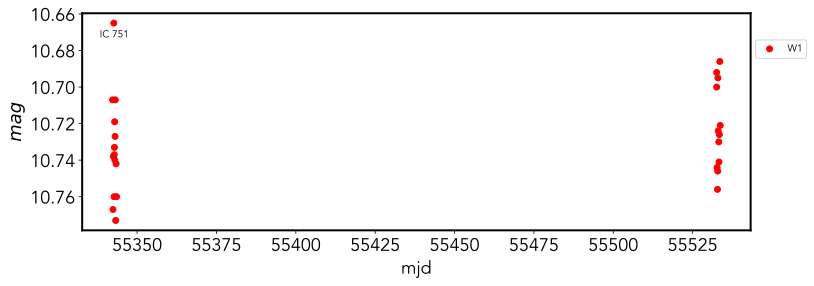

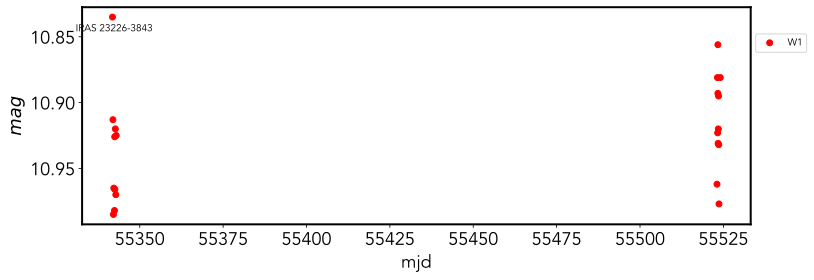

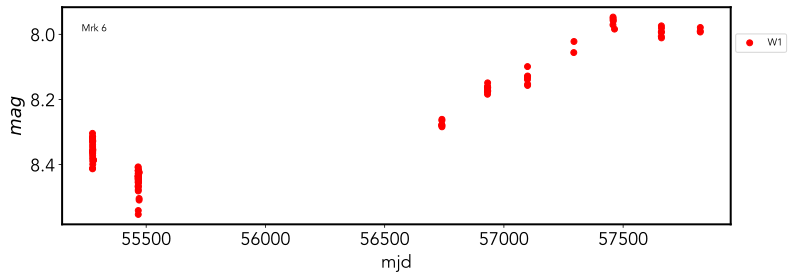

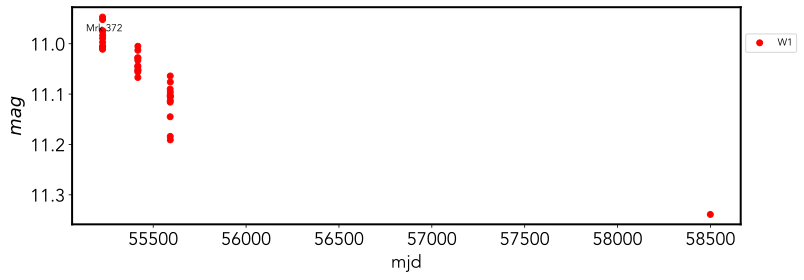

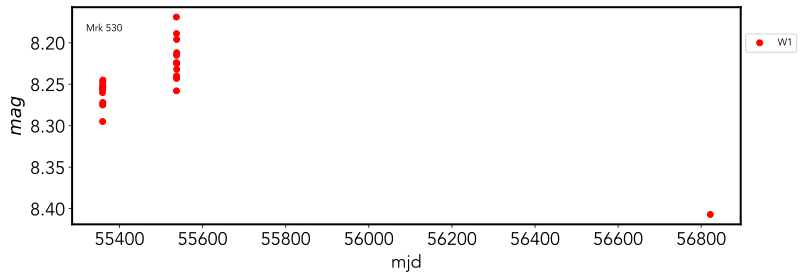

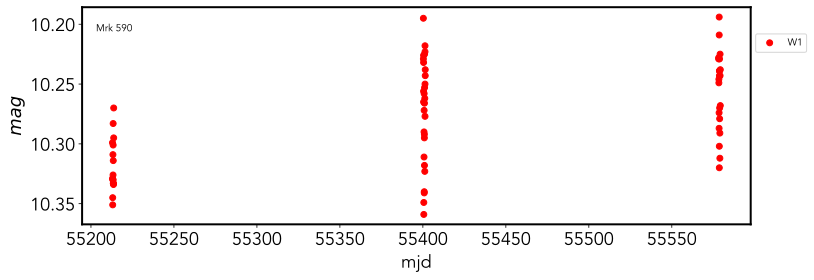

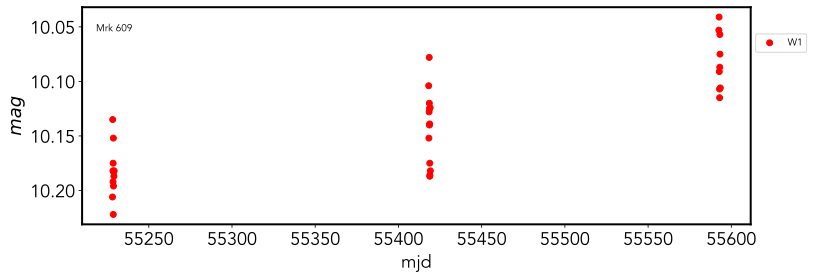

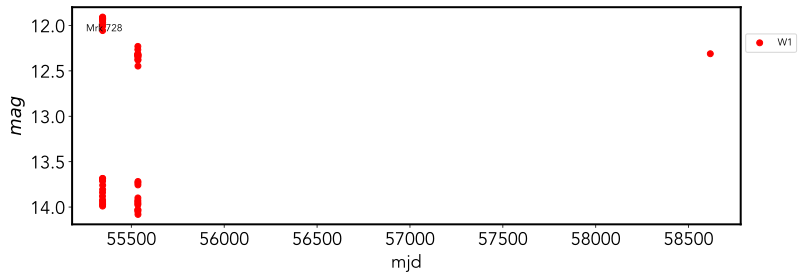

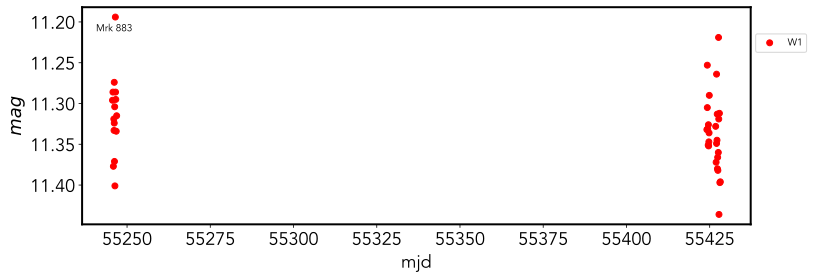

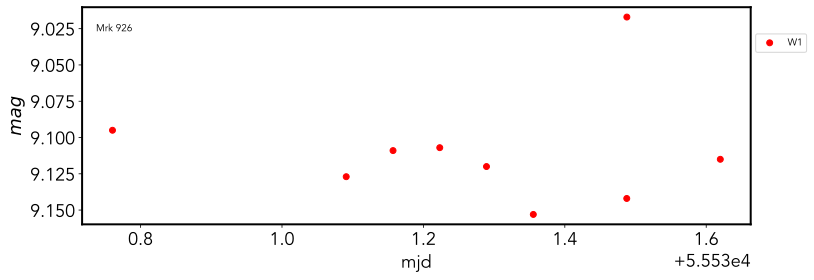

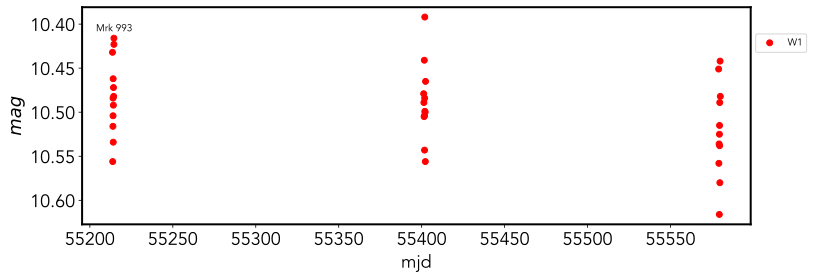

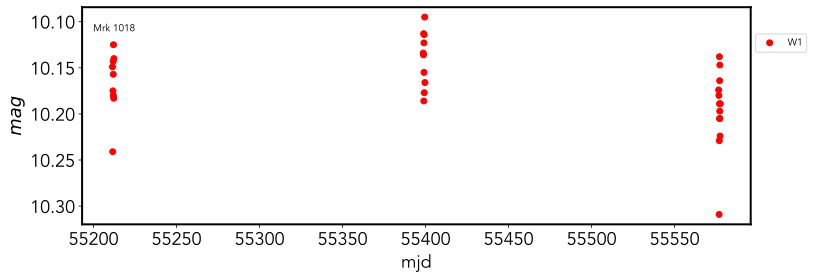

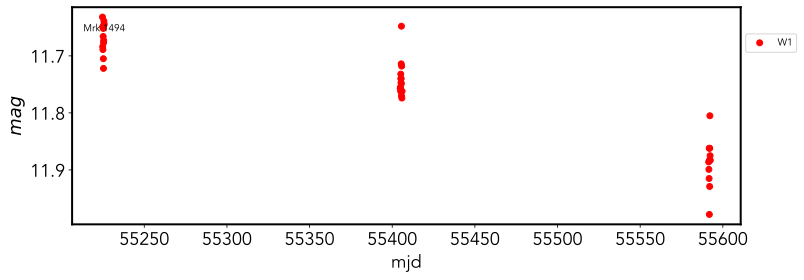

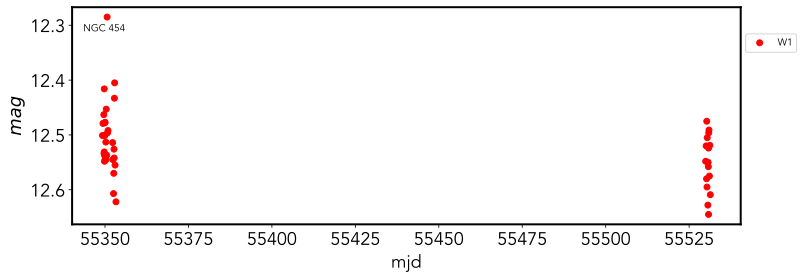

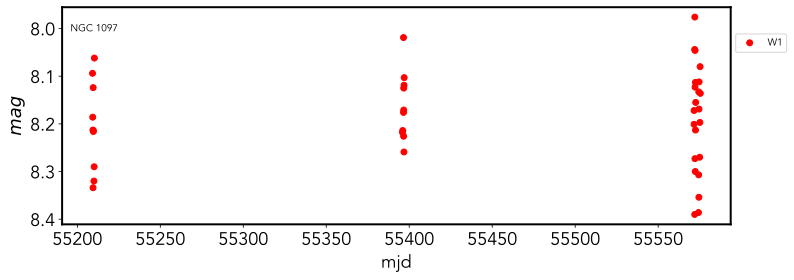

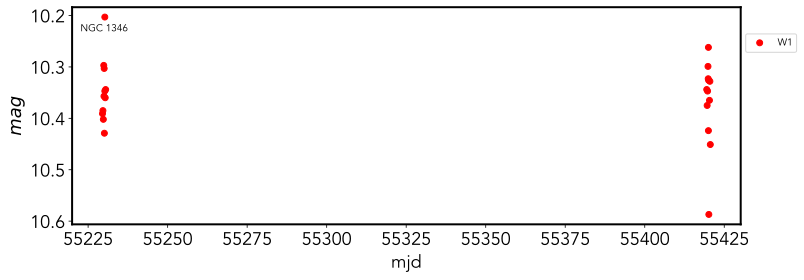

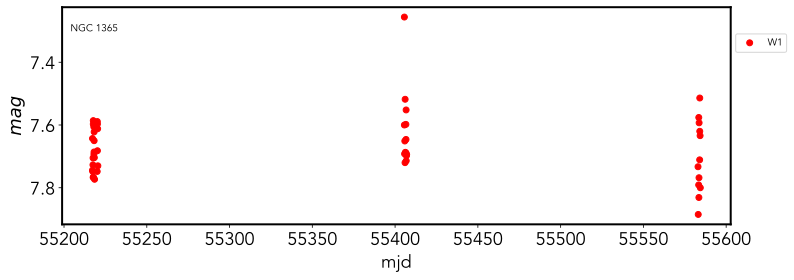

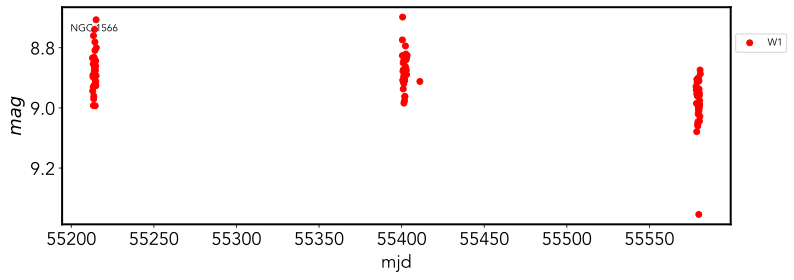

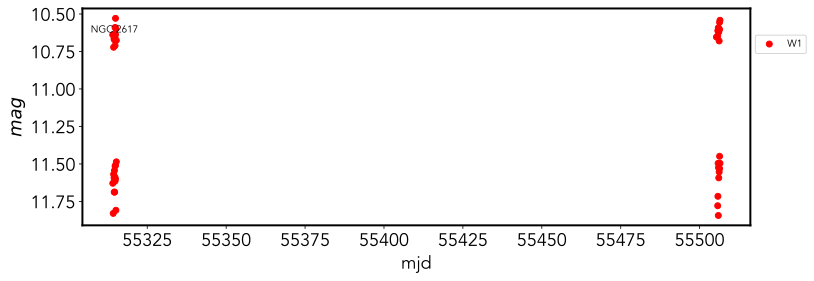

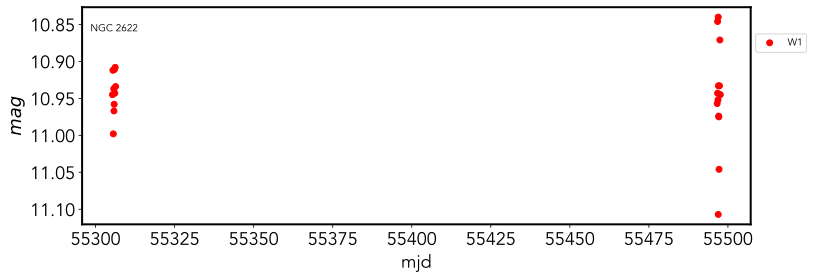

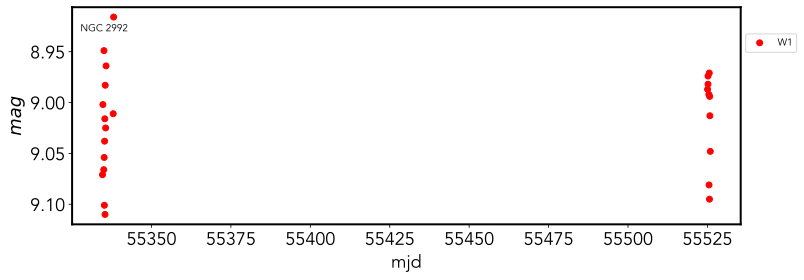

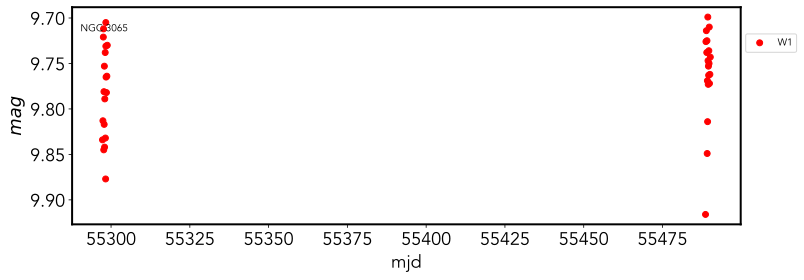

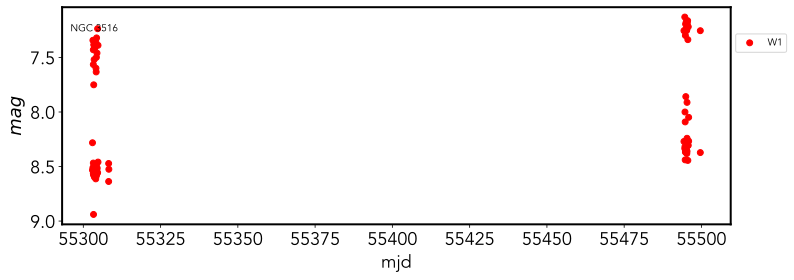

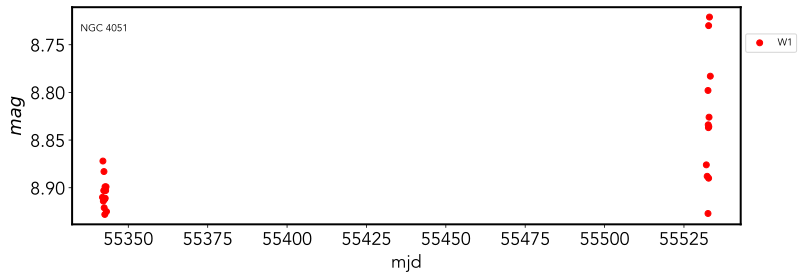

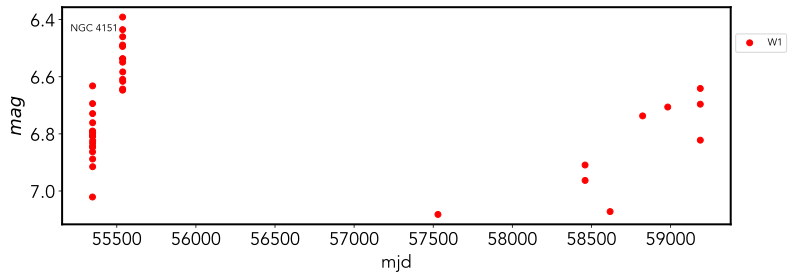

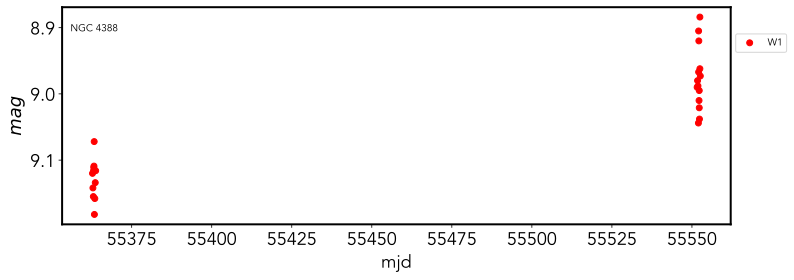

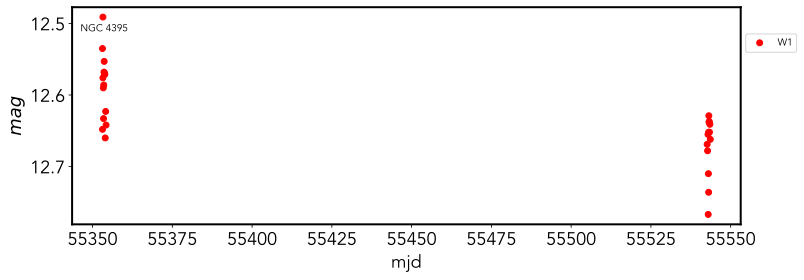

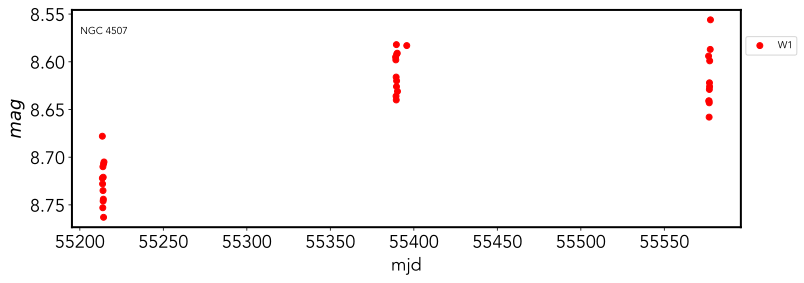

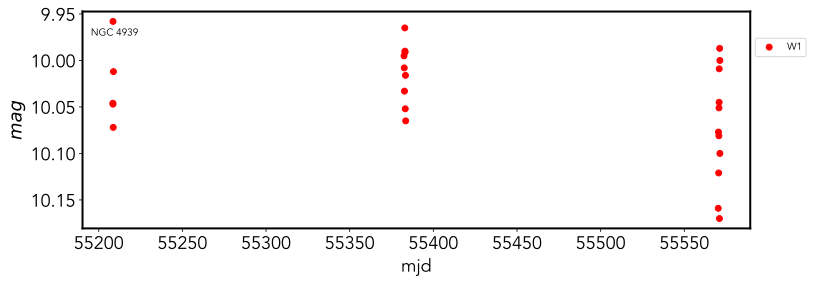

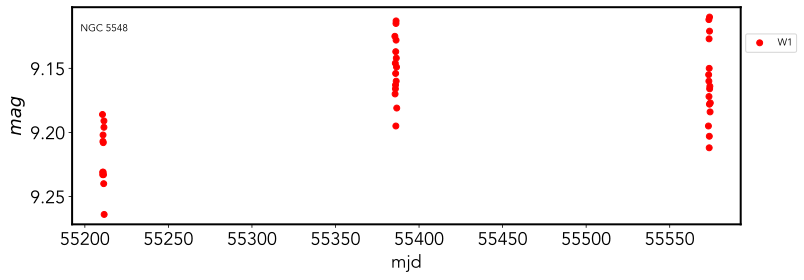

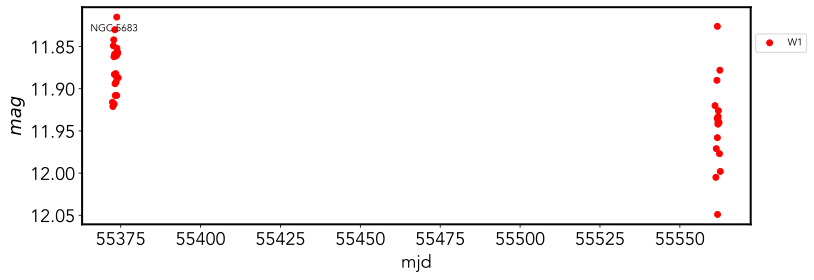

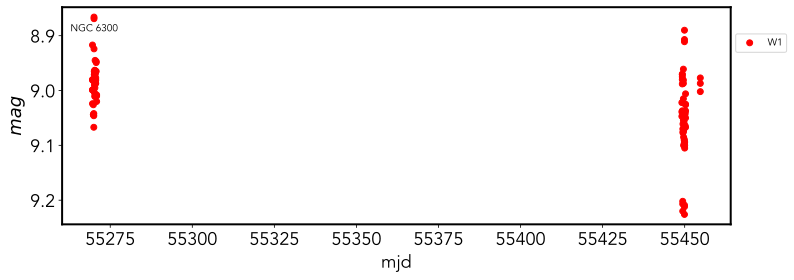

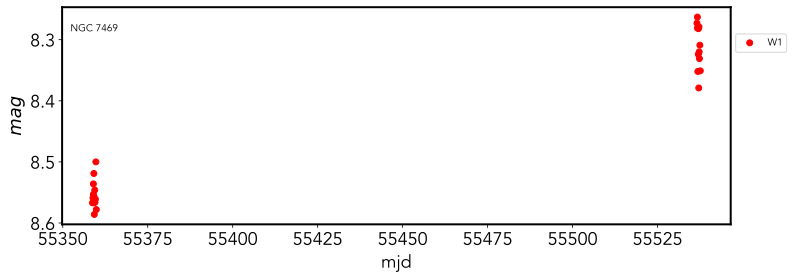

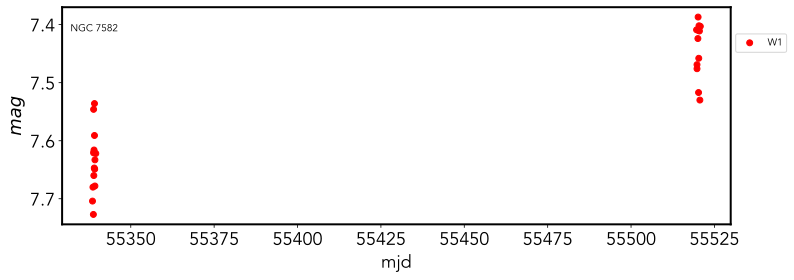

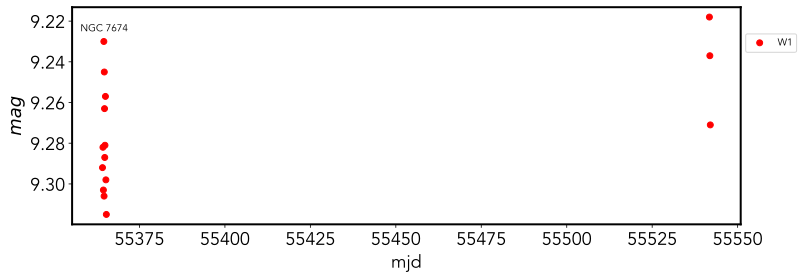

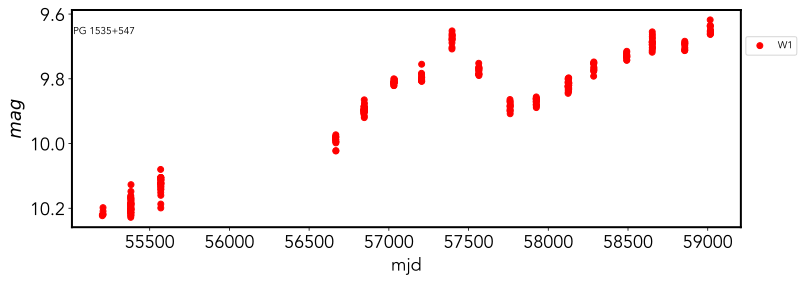

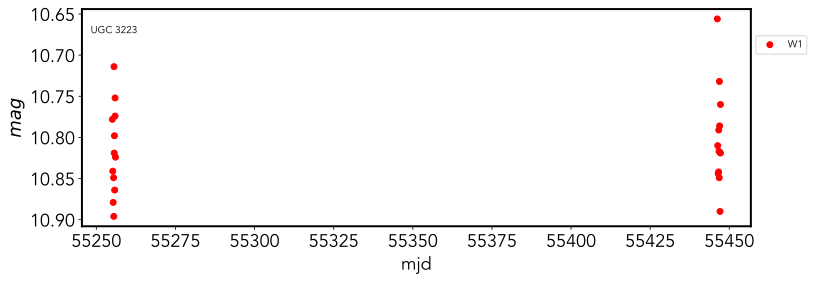

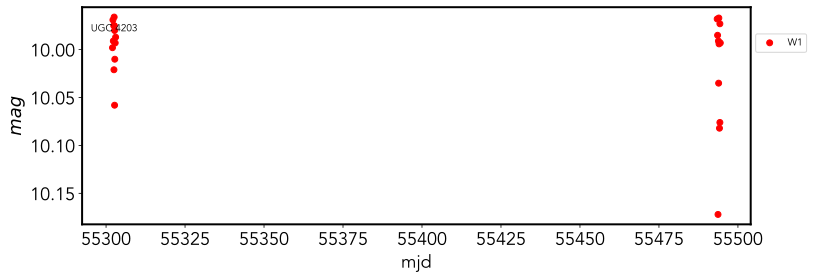

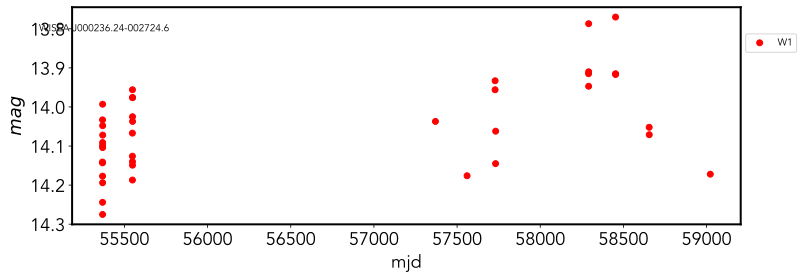

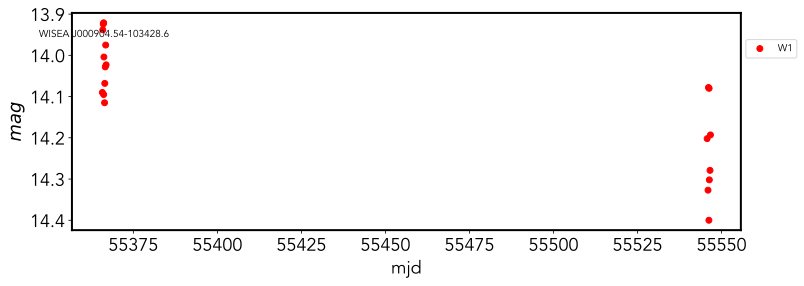

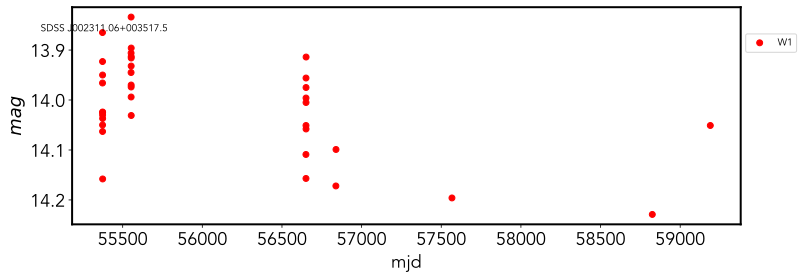

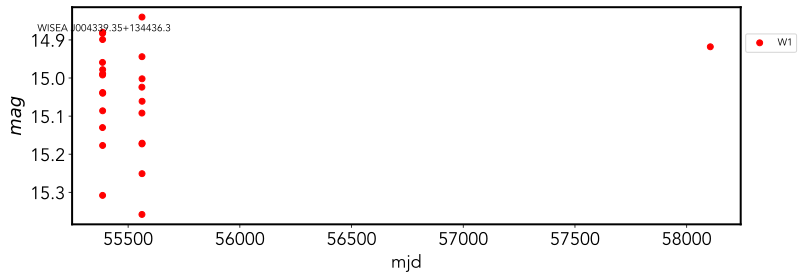

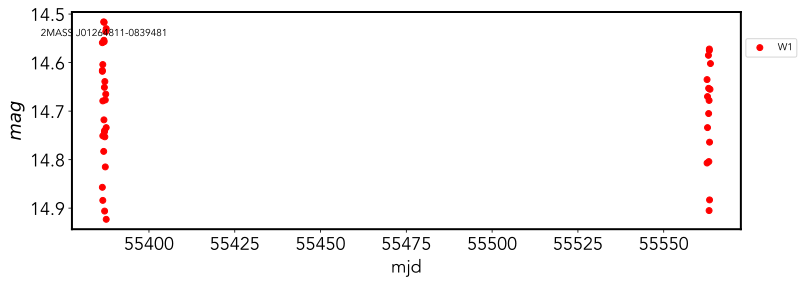

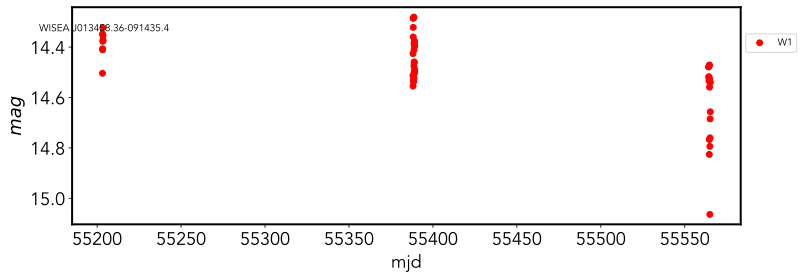

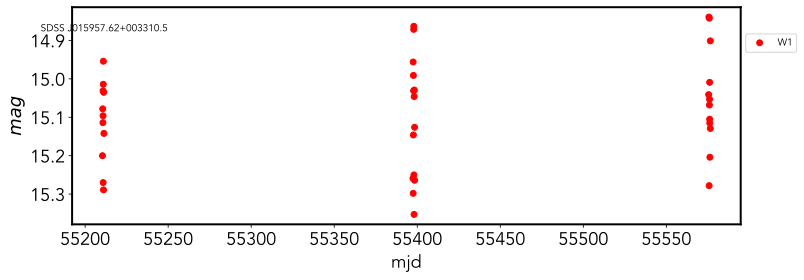

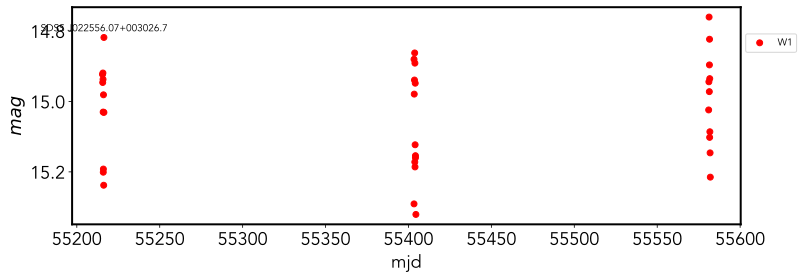

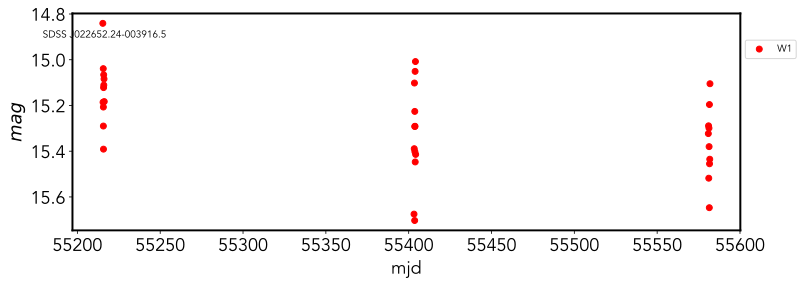

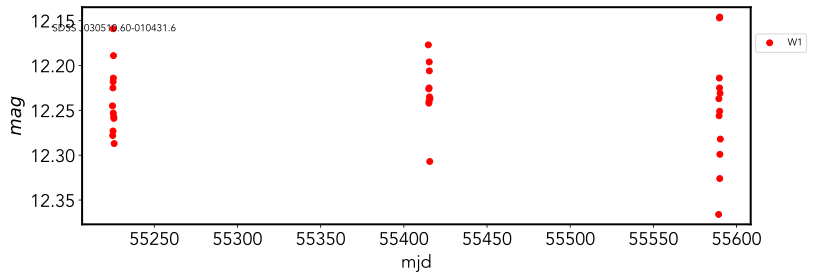

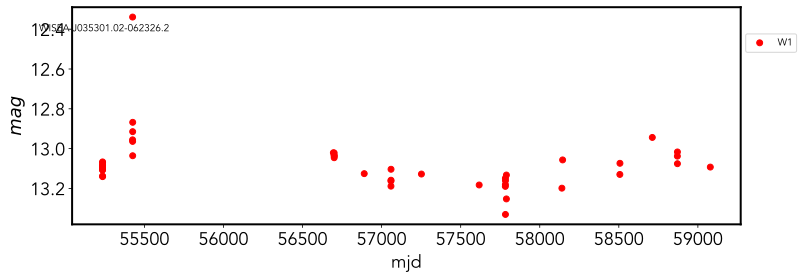

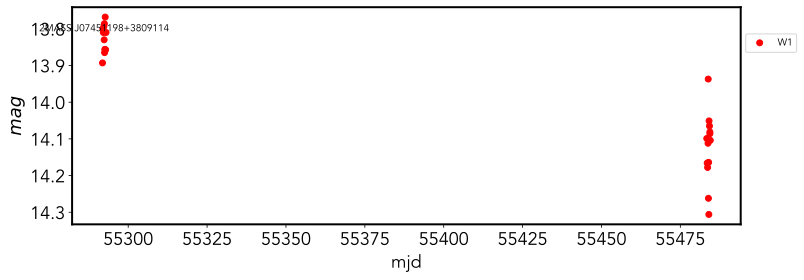

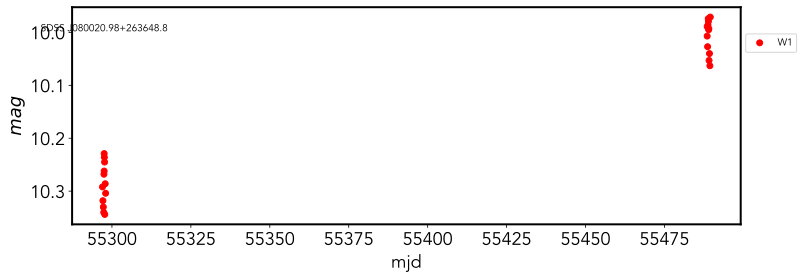

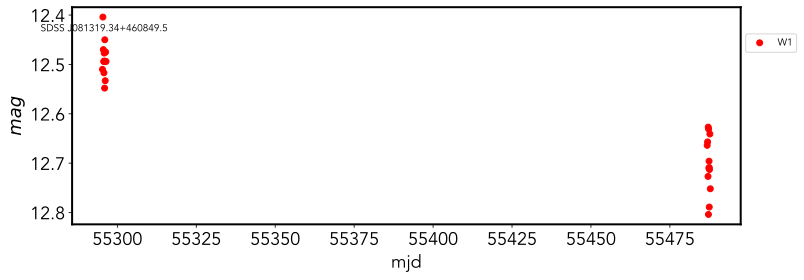

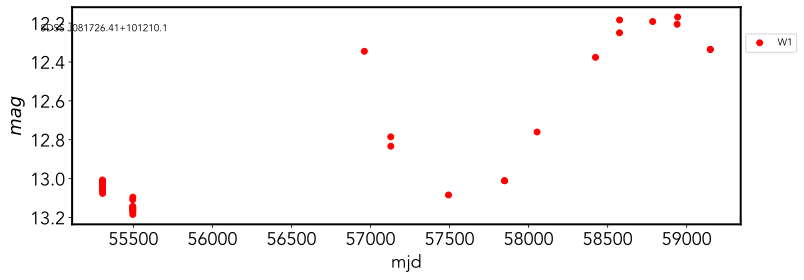

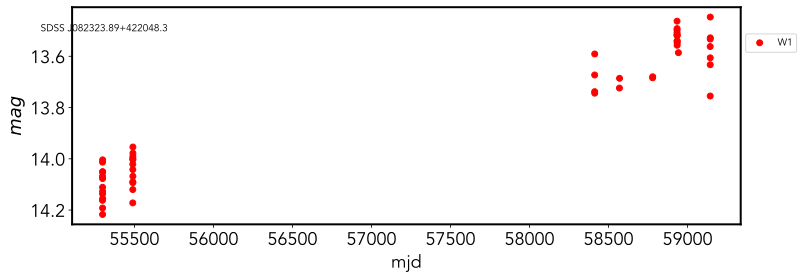

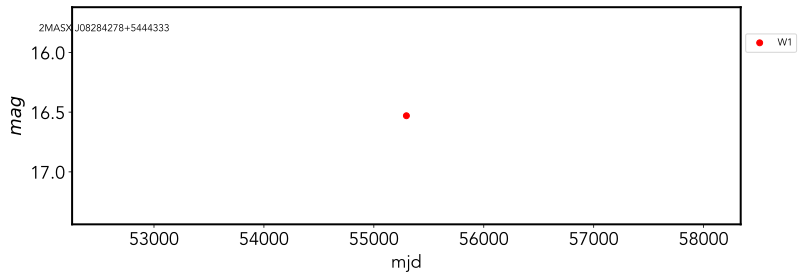

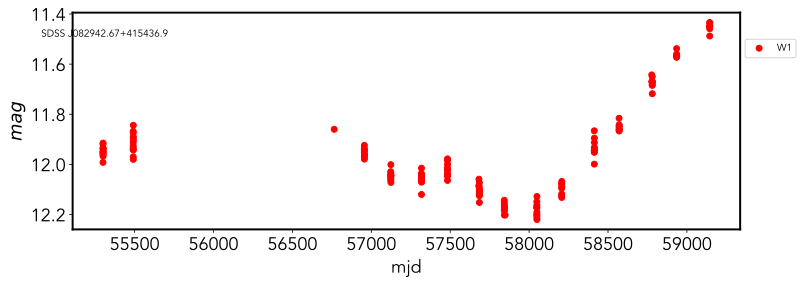

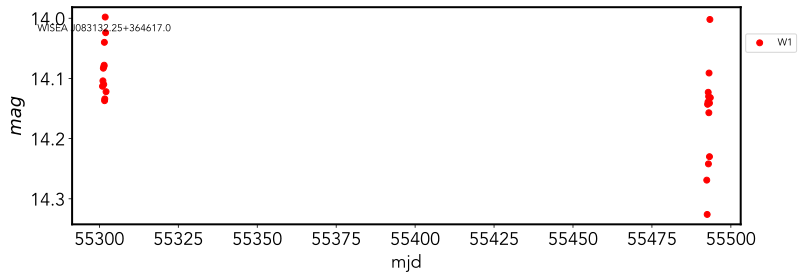

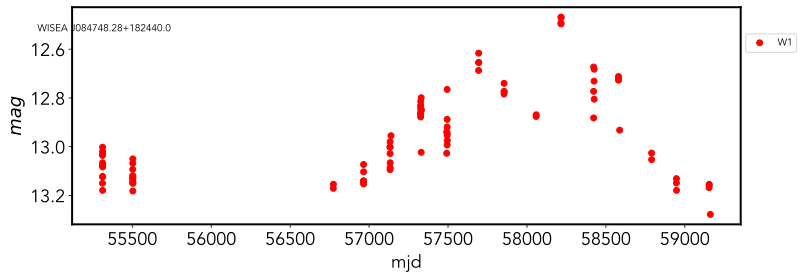

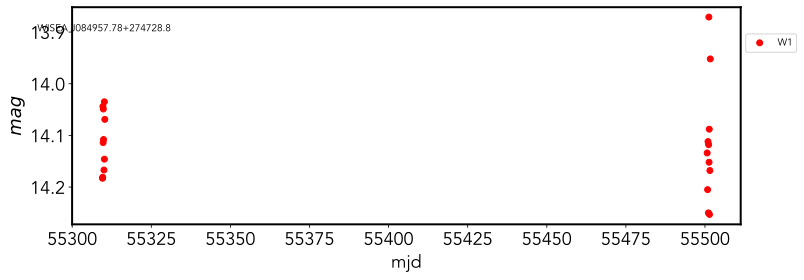

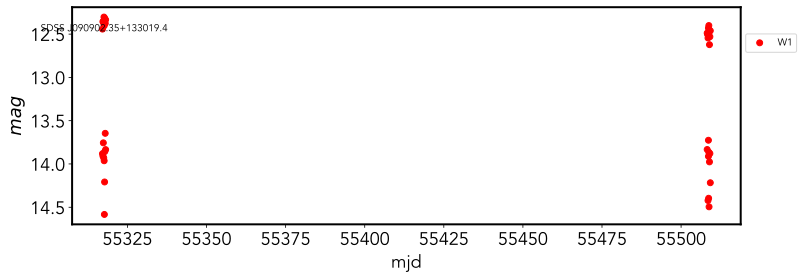

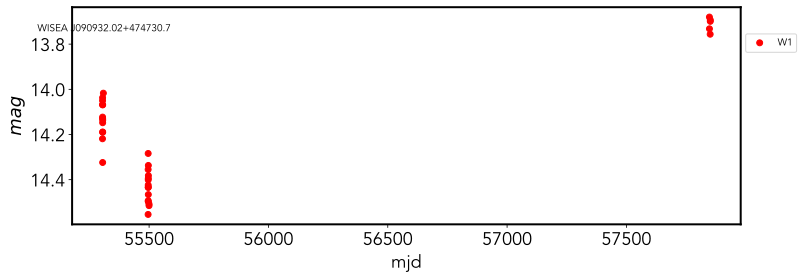

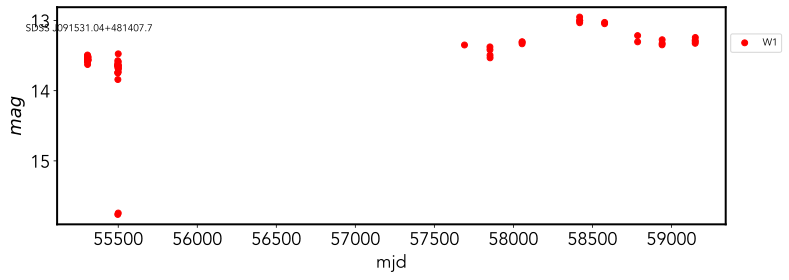

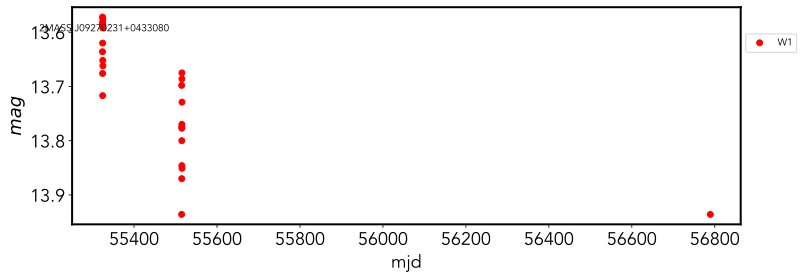

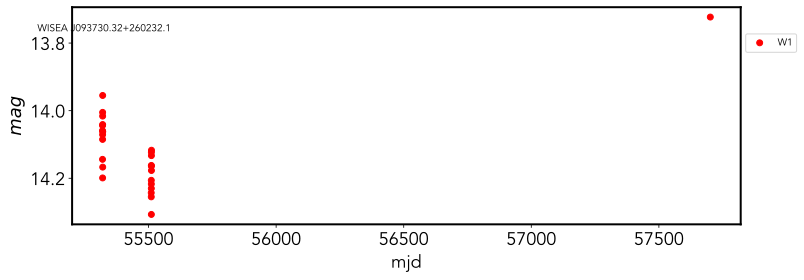

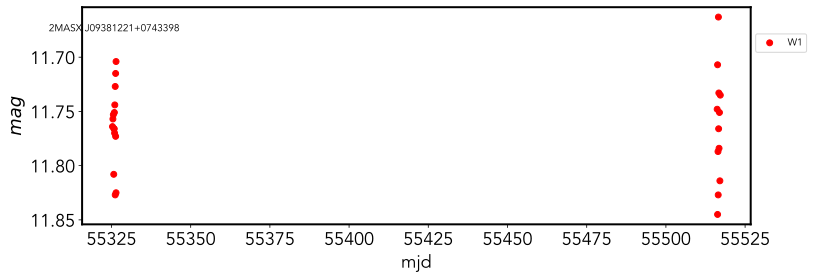

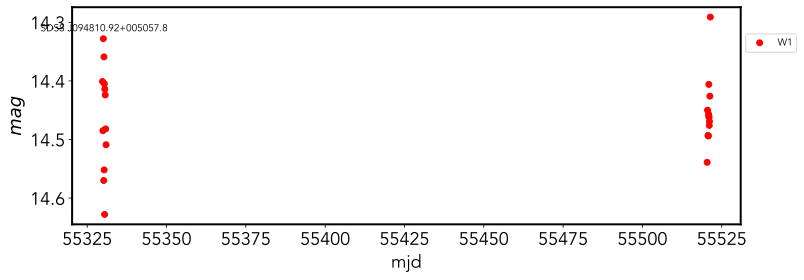

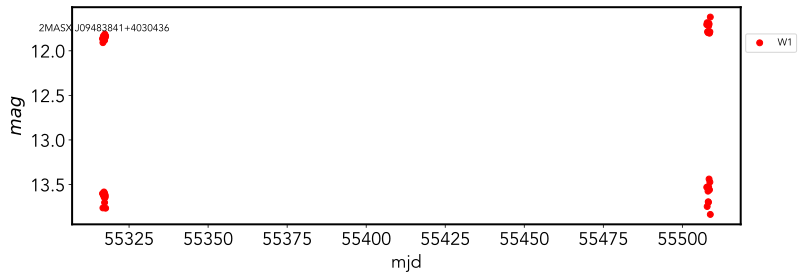

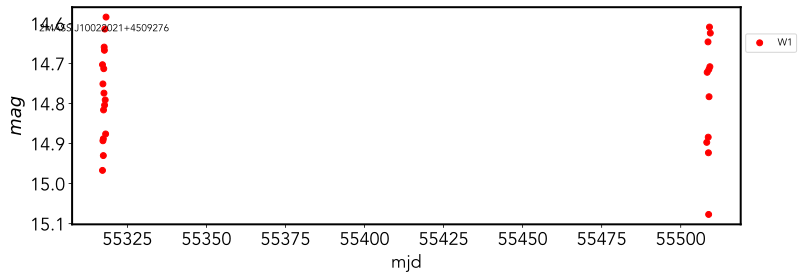

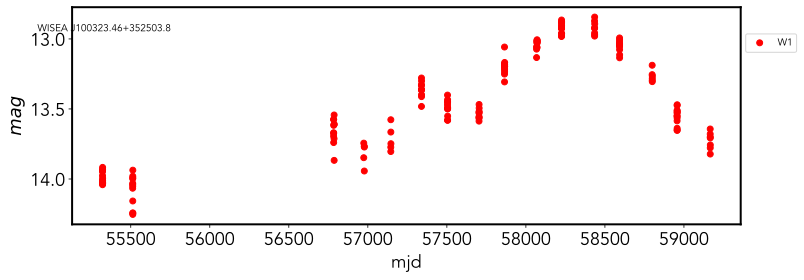

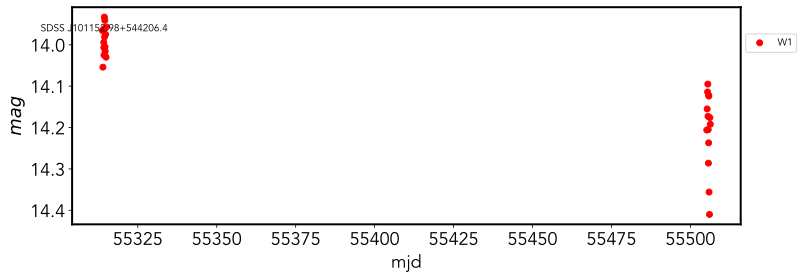

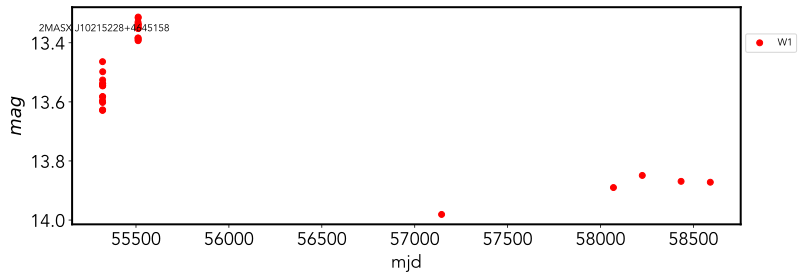

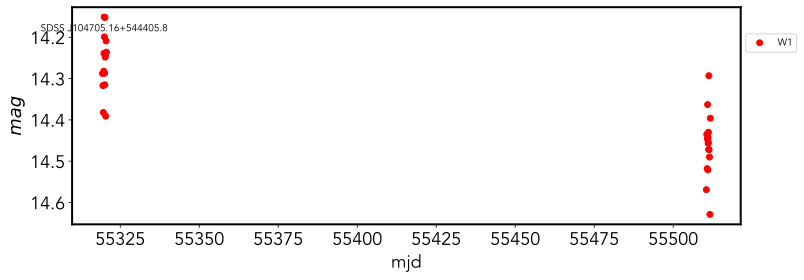

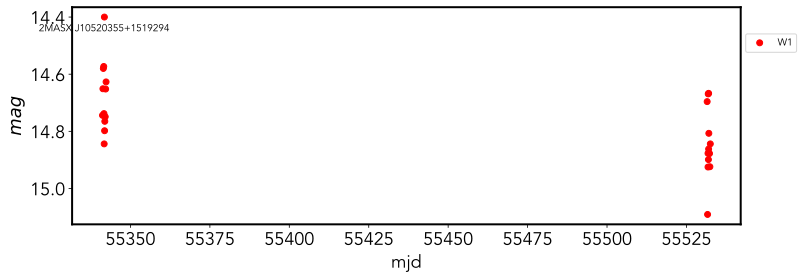

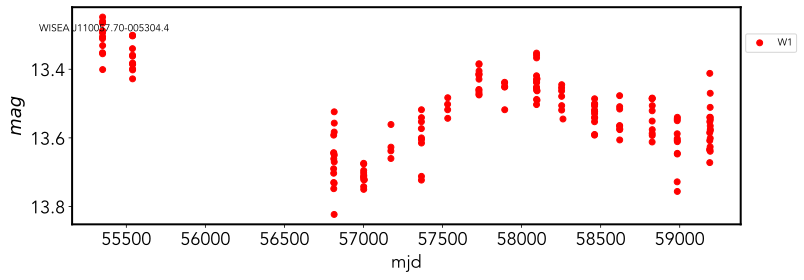

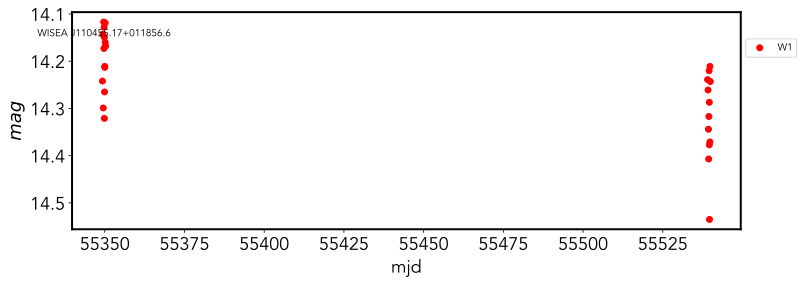

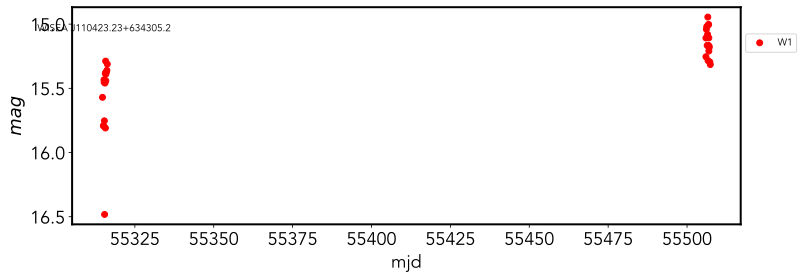

In [ ]:
for index_test in range(len(CLAGN_statistic_2021_liu['Name'])):
    name_test=CLAGN_statistic_2021_liu['Name'][index_test]
    print(name_test)
    search_name=name_test.replace(' ','') 
    save_name=name_test

    data_test_neo=pd.read_csv('wise_%s_neo.csv'%save_name)
    data_test_neo=data_test_neo[data_test_neo['w1mpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w2mpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w1sigmpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w2sigmpro'].notnull()]
    data_test_neo=data_test_neo[data_test_neo['w1mpro']<15]
    data_test_neo=data_test_neo[data_test_neo['w2mpro']<13]  
    data_test_neo=data_test_neo[data_test_neo['w1rchi2']<2]
    #data_test_neo=data_test_neo[data_test_neo['w2rchi2']<2]
    
    data_test_neo=data_test_neo[data_test_neo['qual_frame']>5]
    #print(len(data_test_neo))
    data_test_neo=(data_test_neo.loc[:, ['mjd', 'w1mpro','w2mpro',
                                 'w1sigmpro','w2sigmpro',
                                 ]].sort_values('mjd'))

    data_test_neo=data_test_neo.reset_index(drop=True)
    #print(data_test_neo.columns)

    data_test_mep=pd.read_csv('wise_%s_mep.csv'%save_name)
    data_test_mep=data_test_mep[data_test_mep['w1mpro_ep'].notnull()]
    data_test_mep=data_test_mep[data_test_mep['w2mpro_ep'].notnull()]
    data_test_mep=data_test_mep[data_test_mep['w1sigmpro_ep'].notnull()]
    data_test_mep=data_test_mep[data_test_mep['w2sigmpro_ep'].notnull()]
    #data_test_mep=data_test_mep[data_test_mep['qual_frame']>5]
    data_test_mep=data_test_mep[data_test_mep['qi_fact']>0]
    data_test_mep=data_test_mep[data_test_mep['saa_sep']>0]

    #print(len(data_test_mep))
    data_test_mep=(data_test_mep.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                                         'w1sigmpro_ep','w2sigmpro_ep',
                                         ]].sort_values('mjd'))

    data_test_mep=data_test_mep.reset_index(drop=True)
    #print(data_test_mep.columns)
    
    fig = plt.figure(figsize=(12,4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)

    ax.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
    ax.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')

    
    #ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
    #ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.9),ncol=1,
          loc=2,fontsize=10)
    
    bottom, top = plt.ylim() 
    plt.ylim(top,bottom)
    
    plt.xlabel('mjd')
    plt.ylabel(r'$mag$')
    
    ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
    plt.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/CLAGN/WISE_CLAGN_lc_w1_%s.png'%save_name, 
            dpi=400, transparent=False, bbox_inches='tight')
    #plt.semilogy()    



1ES 1927+654 
15
Index(['mjd', 'w1mpro', 'w2mpro', 'w1sigmpro', 'w2sigmpro'], dtype='object')
68
Index(['mjd', 'w1mpro_ep', 'w2mpro_ep', 'w1sigmpro_ep', 'w2sigmpro_ep'], dtype='object')


Text(0.05, 0.9, '1ES 1927+654 ')

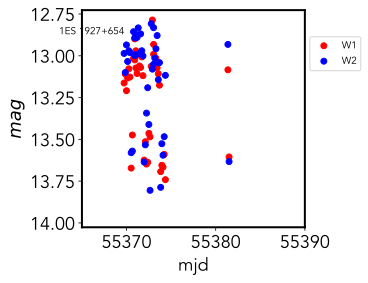

In [185]:
index_test=0
name_test=CLAGN_statistic_2021_liu['Name'][index_test]
print(name_test)
search_name=name_test.replace(' ','') 
save_name=name_test

data_test_neo=pd.read_csv('wise_%s_neo.csv'%save_name)
data_test_neo=data_test_neo[data_test_neo['w1mpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w2mpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w1sigmpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['w2sigmpro'].notnull()]
data_test_neo=data_test_neo[data_test_neo['qual_frame']>5]
print(len(data_test_neo))
data_test_neo=(data_test_neo.loc[:, ['mjd', 'w1mpro','w2mpro',
                             'w1sigmpro','w2sigmpro',
                             ]].sort_values('mjd'))

data_test_neo=data_test_neo.reset_index(drop=True)
print(data_test_neo.columns)

data_test_mep=pd.read_csv('wise_%s_mep.csv'%save_name)
data_test_mep=data_test_mep[data_test_mep['w1mpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w2mpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w1sigmpro_ep'].notnull()]
data_test_mep=data_test_mep[data_test_mep['w2sigmpro_ep'].notnull()]
#data_test_mep=data_test_mep[data_test_mep['qual_frame']>5]
data_test_mep=data_test_mep[data_test_mep['qi_fact']>0]
data_test_mep=data_test_mep[data_test_mep['saa_sep']>0]
    
print(len(data_test_mep))
data_test_mep=(data_test_mep.loc[:, ['mjd', 'w1mpro_ep','w2mpro_ep',
                                     'w1sigmpro_ep','w2sigmpro_ep',
                                     ]].sort_values('mjd'))

data_test_mep=data_test_mep.reset_index(drop=True)
print(data_test_mep.columns)


fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

#ax.scatter(data_test_neo['mjd'],data_test_neo['w1mpro'],color='red',label='W1')
ax.scatter(data_test_mep['mjd'],data_test_mep['w1mpro_ep'],color='red',label='W1')


#ax.scatter(data_test_neo['mjd'],data_test_neo['w2mpro'],color='blue',label='W2')
ax.scatter(data_test_mep['mjd'],data_test_mep['w2mpro_ep'],color='blue',label='W2')
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.9),ncol=1,
      loc=2,fontsize=10)

bottom, top = plt.ylim() 
plt.ylim(top,bottom)

plt.xlabel('mjd')
plt.ylabel(r'$mag$')
plt.xlim(55365,55390)
ax.text(0.05, 0.9,name_test , horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)


# type A B

In [110]:
typeA=CLAGN_statistic_2021_liu[CLAGN_statistic_2021_liu['type']==' A ']
typeB=CLAGN_statistic_2021_liu[CLAGN_statistic_2021_liu['type']==' B ']

typeA=typeA.reset_index(drop=True)
typeB=typeB.reset_index(drop=True)

## mean and sigma_m

In [45]:
typeA.columns

Index(['Name', 'z', 'type1or2', 'type', 'ref1', 'logM', 'ref2',
       'sigma_m_w1_neo', 'mean_m_w1_neo', 'sigma_m_w2_neo', 'mean_m_w2_neo'],
      dtype='object')

(18.0, 0.0)

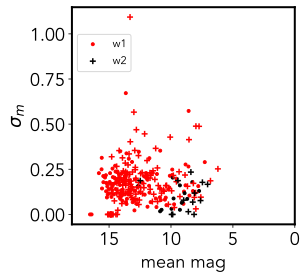

In [103]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plt.scatter(typeA['mean_m_w1_neo'],typeA['sigma_m_w1_neo'],color='red',marker='.',label='w1')
plt.scatter(typeB['mean_m_w1_neo'],typeB['sigma_m_w1_neo'],color='black',marker='.')

plt.scatter(typeA['mean_m_w2_neo'],typeA['sigma_m_w2_neo'],color='red',marker='+')
plt.scatter(typeB['mean_m_w2_neo'],typeB['sigma_m_w2_neo'],color='black',marker='+',label='w2')

ax.legend( bbox_to_anchor=(0.0, 0.9),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
plt.xlabel('mean mag')
plt.ylabel(r'$\sigma_m$')
plt.xlim(18,0)

#ax.text(0.1, 0.9, 'w1_neo', horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
#plt.semilogy()

(18.0, 0.0)

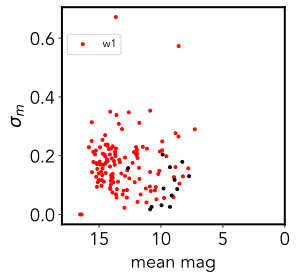

In [104]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plt.scatter(typeA['mean_m_w1_neo'],typeA['sigma_m_w1_neo'],color='red',marker='.',label='w1')
plt.scatter(typeB['mean_m_w1_neo'],typeB['sigma_m_w1_neo'],color='black',marker='.')

#plt.scatter(typeA['mean_m_w2_neo'],typeA['sigma_m_w2_neo'],color='red',marker='+')
#plt.scatter(typeB['mean_m_w2_neo'],typeB['sigma_m_w2_neo'],color='black',marker='+',label='w2')

ax.legend( bbox_to_anchor=(0.0, 0.9),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
plt.xlabel('mean mag')
plt.ylabel(r'$\sigma_m$')
plt.xlim(18,0)

#ax.text(0.1, 0.9, 'w1_neo', horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
#plt.semilogy()

(18.0, 0.0)

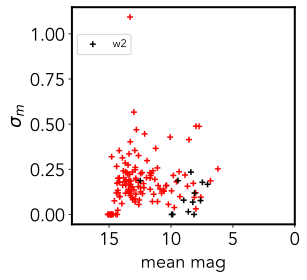

In [105]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

#plt.scatter(typeA['mean_m_w1_neo'],typeA['sigma_m_w1_neo'],color='red',marker='.',label='w1')
#plt.scatter(typeB['mean_m_w1_neo'],typeB['sigma_m_w1_neo'],color='black',marker='.')

plt.scatter(typeA['mean_m_w2_neo'],typeA['sigma_m_w2_neo'],color='red',marker='+')
plt.scatter(typeB['mean_m_w2_neo'],typeB['sigma_m_w2_neo'],color='black',marker='+',label='w2')

ax.legend( bbox_to_anchor=(0.0, 0.9),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
plt.xlabel('mean mag')
plt.ylabel(r'$\sigma_m$')
plt.xlim(18,0)

#ax.text(0.1, 0.9, 'w1_neo', horizontalalignment = 'center', verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
#plt.semilogy()

### subplot

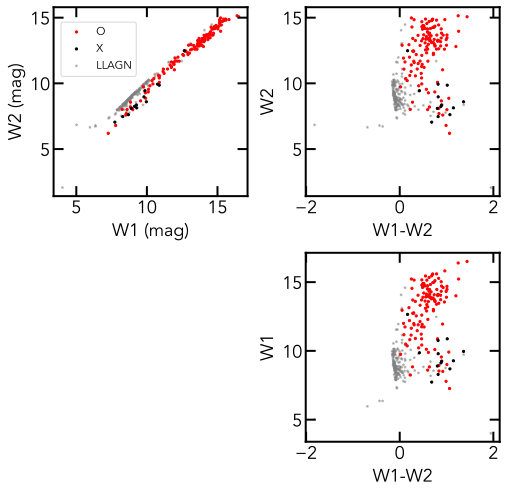

In [111]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.3, wspace = 0.3)

size=5

ax = fig.add_subplot(221)
ax.scatter(typeA['mean_m_w1_neo'],typeA['mean_m_w2_neo'],s=size,color='red',label='O')
ax.scatter(typeB['mean_m_w1_neo'],typeB['mean_m_w2_neo'],s=size,color='black',label='X')
ax.scatter(LLAGN['mean_m_w1_neo'],LLAGN['mean_m_w2_neo'],
           s=size,color='grey',marker='*',alpha=0.5,label='LLAGN',zorder=0)


ax.set_xlabel(r'W1 (mag)')
ax.set_ylabel(r'W2 (mag)')
set_ax_tick(ax)
ax.legend( bbox_to_anchor=(0.01, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=11.)




ax = fig.add_subplot(224)
ax.scatter(typeA['mean_m_w1_neo']-typeA['mean_m_w2_neo'],typeA['mean_m_w1_neo'],s=size,color='red',label='O')
ax.scatter(typeB['mean_m_w1_neo']-typeB['mean_m_w2_neo'],typeB['mean_m_w1_neo'],s=size,color='black',label='X')
ax.scatter(LLAGN['mean_m_w1_neo']-LLAGN['mean_m_w2_neo'],LLAGN['mean_m_w1_neo'],
           s=size,color='grey',marker='*',alpha=0.5,zorder=0)



ax.set_xlabel(r'W1-W2')
ax.set_ylabel(r'W1')
set_ax_tick(ax)

ax = fig.add_subplot(222)
ax.scatter(typeA['mean_m_w1_neo']-typeA['mean_m_w2_neo'],typeA['mean_m_w2_neo'],s=size,color='red',label='O')
ax.scatter(typeB['mean_m_w1_neo']-typeB['mean_m_w2_neo'],typeB['mean_m_w2_neo'],s=size,color='black',label='X')
ax.scatter(LLAGN['mean_m_w1_neo']-LLAGN['mean_m_w2_neo'],LLAGN['mean_m_w2_neo'],
           s=size,color='grey',marker='*',alpha=0.5,zorder=0)


ax.set_xlabel(r'W1-W2')
ax.set_ylabel(r'W2')
set_ax_tick(ax)
fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_color_subplot.png',
            dpi=400, transparent=False, bbox_inches='tight')



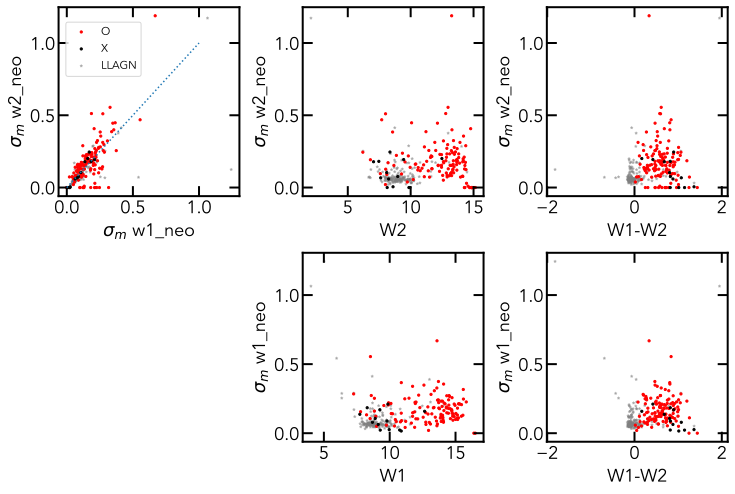

In [112]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.3, wspace = 0.35)
size=5
ax = fig.add_subplot(231)
x=np.linspace(0,1,10)
ax.plot(x,x,ls=':')
ax.scatter(typeA['sigma_m_w1_neo'],typeA['sigma_m_w2_neo'],s=size,color='red',label='O')
ax.scatter(typeB['sigma_m_w1_neo'],typeB['sigma_m_w2_neo'],s=size,color='black',label='X')
ax.scatter(LLAGN['sigma_m_w1_neo'],LLAGN['sigma_m_w2_neo'],
           s=size,color='grey',marker='*',alpha=0.5,label='LLAGN',zorder=0)
ax.set_xlabel(r'$\sigma_m$ w1_neo')
ax.set_ylabel(r'$\sigma_m$ w2_neo')
set_ax_tick(ax)
ax.legend( bbox_to_anchor=(0.01, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=11.)


ax = fig.add_subplot(232)
ax.scatter(typeA['mean_m_w2_neo'],typeA['sigma_m_w2_neo'],s=size,color='red')
ax.scatter(typeB['mean_m_w2_neo'],typeB['sigma_m_w2_neo'],s=size,color='black')
ax.scatter(LLAGN['mean_m_w2_neo'],LLAGN['sigma_m_w2_neo'],
           s=size,color='grey',marker='*',alpha=0.5,label='LLAGN',zorder=0)

ax.set_xlabel(r'W2')
ax.set_ylabel(r'$\sigma_m$ w2_neo')
set_ax_tick(ax)

ax = fig.add_subplot(233)
ax.scatter(typeA['mean_m_w1_neo']-typeA['mean_m_w2_neo'],typeA['sigma_m_w2_neo'],s=size,color='red')
ax.scatter(typeB['mean_m_w1_neo']-typeB['mean_m_w2_neo'],typeB['sigma_m_w2_neo'],s=size,color='black')
ax.scatter(LLAGN['mean_m_w1_neo']-LLAGN['mean_m_w2_neo'],LLAGN['sigma_m_w2_neo'],
           s=size,color='grey',marker='*',alpha=0.5,label='LLAGN',zorder=0)
ax.set_xlabel(r'W1-W2')
ax.set_ylabel(r'$\sigma_m$ w2_neo')
set_ax_tick(ax)


ax = fig.add_subplot(235)
ax.scatter(typeA['mean_m_w1_neo'],typeA['sigma_m_w1_neo'],s=size,color='red')
ax.scatter(typeB['mean_m_w1_neo'],typeB['sigma_m_w1_neo'],s=size,color='black')
ax.scatter(LLAGN['mean_m_w1_neo'],LLAGN['sigma_m_w1_neo'],
           s=size,color='grey',marker='*',alpha=0.5,label='LLAGN',zorder=0)

ax.set_xlabel(r'W1')
ax.set_ylabel(r'$\sigma_m$ w1_neo')
set_ax_tick(ax)

ax = fig.add_subplot(236)
ax.scatter(typeA['mean_m_w1_neo']-typeA['mean_m_w2_neo'],typeA['sigma_m_w1_neo'],s=size,color='red')
ax.scatter(typeB['mean_m_w1_neo']-typeB['mean_m_w2_neo'],typeB['sigma_m_w1_neo'],s=size,color='black')
ax.scatter(LLAGN['mean_m_w1_neo']-LLAGN['mean_m_w2_neo'],LLAGN['sigma_m_w1_neo'],
           s=size,color='grey',marker='*',alpha=0.5,label='LLAGN',zorder=0)
ax.set_xlabel(r'W1-W2')
ax.set_ylabel(r'$\sigma_m$ w1_neo')
set_ax_tick(ax)

fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_subplot.png',
            dpi=400, transparent=False, bbox_inches='tight')



In [92]:
LLAGN.columns

Index(['Name', 'lg(L2-10keV)', 'Sigma_dis', 'lg(MBH/Msun)', 'lg(LEdd)',
       'lg(Lbol)', 'lg(Lbol/LEdd)', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'sigma_m_w1_neo', 'mean_m_w1_neo', 'sigma_m_w2_neo', 'mean_m_w2_neo'],
      dtype='object')

In [93]:
typeA.columns

Index(['Name', 'z', 'type1or2', 'type', 'ref1', 'logM', 'ref2',
       'sigma_m_w1_neo', 'mean_m_w1_neo', 'sigma_m_w2_neo', 'mean_m_w2_neo'],
      dtype='object')

### sigma_m and mass

In [113]:
typeA_mass=typeA.copy()
typeA_mass=typeA_mass[typeA['logM']!=' - ']
typeA_mass=typeA_mass.reset_index(drop=True)

typeB_mass=typeB.copy()
typeB_mass=typeB_mass[typeB['logM']!=' - ']
typeB_mass=typeB_mass.reset_index(drop=True)

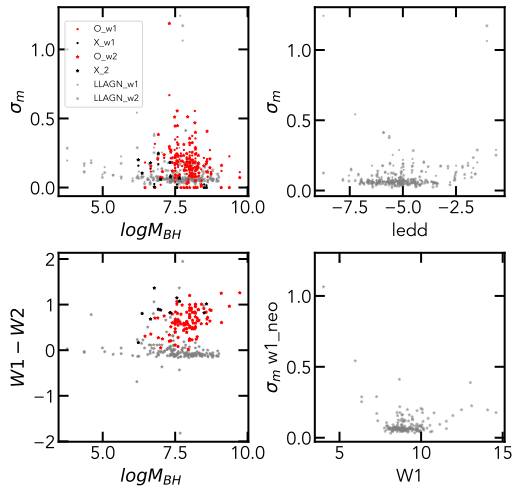

In [116]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.3, wspace = 0.35)
size=7
ax = fig.add_subplot(221)
#x=np.linspace(0,1,10)
#ax.plot(x,x,ls=':')

ax.scatter(typeA_mass['logM'],typeA_mass['sigma_m_w1_neo'],
           s=size,color='red',marker='.',label='O_w1')
ax.scatter(typeB_mass['logM'],typeB_mass['sigma_m_w1_neo'],
           s=size,color='black',marker='.',label='X_w1')

ax.scatter(typeA_mass['logM'],typeA_mass['sigma_m_w2_neo'],
           s=size,color='red',marker='*',label='O_w2')
ax.scatter(typeB_mass['logM'],typeB_mass['sigma_m_w2_neo'],
           s=size,color='black',marker='*',label='X_2')

ax.scatter(LLAGN['lg(MBH/Msun)'],LLAGN['sigma_m_w1_neo'],
           s=size,color='grey',marker='.',alpha=0.5,label='LLAGN_w1',zorder=0)
ax.scatter(LLAGN['lg(MBH/Msun)'],LLAGN['sigma_m_w2_neo'],
           s=size,color='grey',marker='*',alpha=0.5,label='LLAGN_w2',zorder=0)

ax.set_xlabel(r'$log M_{BH}$ ')
ax.set_ylabel(r'$\sigma_m$')
set_ax_tick(ax)
ax.legend( bbox_to_anchor=(0.01, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=9.)


ax = fig.add_subplot(223)
ax.scatter(typeA_mass['logM'],typeA_mass['mean_m_w1_neo']-typeA_mass['mean_m_w2_neo'],
           s=size,color='red',marker='.',label='O')
ax.scatter(typeB_mass['logM'],typeB_mass['mean_m_w1_neo']-typeB_mass['mean_m_w2_neo'],
           s=size,color='black',marker='.',label='X')

ax.scatter(typeA_mass['logM'],typeA_mass['mean_m_w1_neo']-typeA_mass['mean_m_w2_neo'],
           s=size,color='red',marker='*',label='O')
ax.scatter(typeB_mass['logM'],typeB_mass['mean_m_w1_neo']-typeB_mass['mean_m_w2_neo'],
           s=size,color='black',marker='*',label='X')

ax.scatter(LLAGN['lg(MBH/Msun)'],LLAGN['mean_m_w1_neo']-LLAGN['mean_m_w2_neo'],
           s=size,color='grey',marker='.',alpha=0.5,label='LLAGN',zorder=0)
ax.scatter(LLAGN['lg(MBH/Msun)'],LLAGN['mean_m_w1_neo']-LLAGN['mean_m_w2_neo'],
           s=size,color='grey',marker='*',alpha=0.5,label='LLAGN',zorder=0)

ax.set_xlabel(r'$log M_{BH}$ ')
ax.set_ylabel(r'$W1-W2$')
set_ax_tick(ax)



ax = fig.add_subplot(222)

ax.scatter(LLAGN['lg(Lbol/LEdd)'],LLAGN['sigma_m_w1_neo'],
           s=size,color='grey',marker='.',alpha=0.5,label='LLAGN',zorder=0)
ax.scatter(LLAGN['lg(Lbol/LEdd)'],LLAGN['sigma_m_w2_neo'],
           s=size,color='grey',marker='*',alpha=0.5,label='LLAGN',zorder=0)

ax.set_xlabel(r'ledd')
ax.set_ylabel(r'$\sigma_m$')
set_ax_tick(ax)


ax = fig.add_subplot(224)

ax.scatter(LLAGN['mean_m_w1_neo'],LLAGN['sigma_m_w1_neo'],
           s=size,color='grey',marker='*',alpha=0.5,label='LLAGN',zorder=0)

ax.set_xlabel(r'W1')
ax.set_ylabel(r'$\sigma_m$ w1_neo')
set_ax_tick(ax)


fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability_subplot_mass_ledd.png',
            dpi=400, transparent=False, bbox_inches='tight')




## mean AB

In [127]:
np.mean(CLAGN_statistic_2021_liu['sigma_m_w1_neo']),np.mean(CLAGN_statistic_2021_liu['sigma_m_w2_neo'])

(0.16552494073735752, 0.17329651101130528)

In [128]:
np.mean(typeA['sigma_m_w1_neo']),np.mean(typeB['sigma_m_w1_neo']),

(0.17210675861568928, 0.09859742561772247)

In [129]:
np.mean(typeA['sigma_m_w2_neo']),np.mean(typeB['sigma_m_w2_neo']),

(0.18064849238430467, 0.10086362795916634)

In [130]:
np.mean(typeA['mean_m_w1_neo']),np.mean(typeB['mean_m_w1_neo']),

(13.020923915190261, 9.628431427286937)

In [131]:
np.mean(typeA['mean_m_w2_neo']),np.mean(typeB['mean_m_w2_neo']),

(12.414692368481482, 8.789061471839371)

In [132]:
np.mean(typeA['sigma_m_w1_neo']),np.mean(typeA['sigma_m_w2_neo'])

(0.17210675861568928, 0.18064849238430467)

In [133]:
np.mean(typeB['sigma_m_w1_neo']),np.mean(typeB['sigma_m_w2_neo'])

(0.09859742561772247, 0.10086362795916634)

## type B

Text(0, 0.5, '$\\sigma_m$ w2_neo')

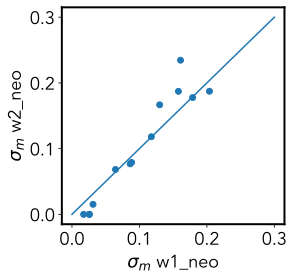

In [116]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)
x=np.linspace(0,0.3,10)
plt.plot(x,x)
plt.scatter(typeB['sigma_m_w1_neo'],typeB['sigma_m_w2_neo'])
plt.xlabel(r'$\sigma_m$ w1_neo')
plt.ylabel(r'$\sigma_m$ w2_neo')

In [117]:
typeB_plot=typeB.copy()
typeB_plot=typeB_plot.reset_index(drop=True)

In [118]:
typeB_plot

Name      z     type1or2 type  ref1  logM        ref2  \
0   1H 0419-577   0.104  Seyfert 1.5   B     -3  8.58    (4)   \\   
1        IC 751   0.032       Type 2   B    -10   8.5   (10)   \\   
2       NGC 454   0.012    Seyfert 2   B    -23  6.23   (24)   \\   
3      NGC 1365   0.005     Type 1.8   B    -26  6.65   (27)   \\   
4      NGC 4051   0.002        NLS 1   B     -3  6.36   (35)   \\   
5      NGC 4388   0.008    Seyfert 2   B     -3  6.92   (36)   \\   
6      NGC 4507   0.012    Seyfert 2   B    -37  7.65    (39)  \\   
7      NGC 4939   0.010    Seyfert 2   B    -40    -       -   \\   
8      NGC 6300   0.004    Seyfert 2   B    -43     7   (43)   \\   
9      NGC 7469   0.016   Seyfert 1    B    -41  7.32   (15)   \\   
10     NGC 7674   0.029    Seyfert 2   B    -45  7.56   (46)   \\   
11  PG 1535+547   0.039        NLS 1   B    -47  7.34   (47)   \\   
12     UGC 4203   0.014    Seyfert 2   B    -26  6.78   (15)   \\   

    sigma_m_w1_neo  mean_m_w1_neo  sigma_m_w2_neo  mean_m_w2_neo  \
0         0.017303      10.876378        0.000000       9.860934   
1         0.025609      10.759981        0.000000       9.944550   
2         0.157796      12.652755        0.187226      12.482449   
3         0.130022       7.728705        0.166693       7.043102   
4         0.117716       8.901658        0.118103       8.097731   
5         0.160938       9.279687        0.234544       8.391547   
6         0.086324       8.684976        0.076840       7.613361   
7         0.203827       9.862067        0.187342       9.441352   
8         0.064525       9.132933        0.068277       8.240784   
9         0.178914       8.278170        0.177737       7.461547   
10        0.025870       9.279841        0.000000       8.135055   
11        0.088413       9.791642        0.078979       8.972102   
12        0.031237       9.957411        0.015272       8.596095   

    sigma_m_w1_mep  mean_m_w1_mep  sigma_m_w2_mep  mean_m_w2_mep  
0         0.016404      10.830919        0.035198       9.808713  
1         0.000000      10.728308        0.011628       9.890577  
2         0.050122      12.521533        0.056803      12.334133  
3         0.095626       7.669708        0.065198       6.920125  
4         0.047820       8.870692        0.015879       7.964269  
5         0.079849       9.043680        0.069195       8.029440  
6         0.049124       8.651943        0.047822       7.573314  
7         0.043787      10.042000        0.049343       9.696400  
8         0.062807       9.021823        0.045760       7.960583  
9         0.121932       8.437520        0.067355       7.638040  
10        0.000000       9.272333        0.000000       8.110867  
11        0.020608      10.170031        0.018366       9.290108  
12        0.035903      10.006913        0.000000       8.614043

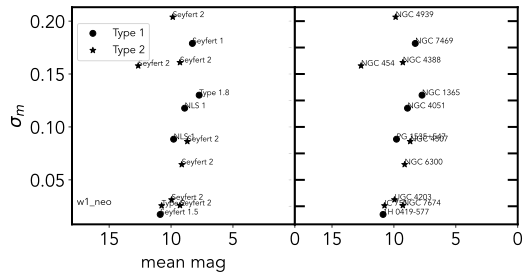

In [122]:
fig = plt.figure(figsize=(8,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(121)

for i in range(len(typeB_plot)):
    type1or2=float(typeB.iloc[i]['type1or2'].split(' ')[1])
    #print(type1or2)
    if type1or2>=1.9:
        color='black'
        label='Type 2'
        marker='*'
    else:
        color='black'
        label='Type 1'
        marker='o'
        
    ax.text(typeB.iloc[i]['mean_m_w1_neo'],typeB.iloc[i]['sigma_m_w1_neo'],
             typeB.iloc[i]['type1or2'],fontsize = 8)    
    ax.scatter(typeB.iloc[i]['mean_m_w1_neo'],typeB.iloc[i]['sigma_m_w1_neo'],
                color=color,marker=marker,
                label=label)

ax2 = fig.add_subplot(122)
for i in range(len(typeB_plot)):
    type1or2=float(typeB.iloc[i]['type1or2'].split(' ')[1])
    #print(type1or2)
    if type1or2>=1.9:
        color='black'
        label='Type 2'
        marker='*'
    else:
        color='black'
        label='Type 1'
        marker='o'
        
    ax2.text(typeB.iloc[i]['mean_m_w1_neo'],typeB.iloc[i]['sigma_m_w1_neo'],
             typeB.iloc[i]['Name'],fontsize = 8)    
    ax2.scatter(typeB.iloc[i]['mean_m_w1_neo'],typeB.iloc[i]['sigma_m_w1_neo'],
                color=color,marker=marker,
                label=label)
    

ax.set_xlabel('mean mag')
ax.set_ylabel(r'$\sigma_m$')
ax.set_xlim(18,0)
ax2.set_xlim(18,0)
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',labelsize=0)
ax.text(0.1, 0.1, 'w1_neo', horizontalalignment = 'center', 
             verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
#plt.semilogy()    

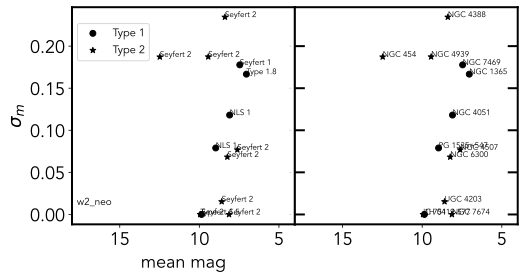

In [123]:
fig = plt.figure(figsize=(8,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(121)

for i in range(len(typeB_plot)):
    type1or2=float(typeB.iloc[i]['type1or2'].split(' ')[1])
    #print(type1or2)
    if type1or2>=1.9:
        color='black'
        label='Type 2'
        marker='*'
    else:
        color='black'
        label='Type 1'
        marker='o'
    ax.text(typeB.iloc[i]['mean_m_w2_neo'],typeB.iloc[i]['sigma_m_w2_neo'],
             typeB.iloc[i]['type1or2'],fontsize = 8)
    
    ax.scatter(typeB.iloc[i]['mean_m_w2_neo'],typeB.iloc[i]['sigma_m_w2_neo'],
                color=color,marker=marker,
                label=label)
    
ax2 = fig.add_subplot(122)
for i in range(len(typeB_plot)):
    type1or2=float(typeB.iloc[i]['type1or2'].split(' ')[1])
    #print(type1or2)
    if type1or2>=1.9:
        color='black'
        label='Type 2'
        marker='*'
    else:
        color='black'
        label='Type 1'
        marker='o'
    
    ax2.text(typeB.iloc[i]['mean_m_w2_neo'],typeB.iloc[i]['sigma_m_w2_neo'],
             typeB.iloc[i]['Name'],fontsize = 8)
    
    ax2.scatter(typeB.iloc[i]['mean_m_w2_neo'],typeB.iloc[i]['sigma_m_w2_neo'],
                color=color,marker=marker,
                label=label)
    
ax.set_xlabel('mean mag')
ax.set_ylabel(r'$\sigma_m$')
ax.set_xlim(18,4)
ax2.set_xlim(18,4)
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',labelsize=0)

ax.text(0.1, 0.1, 'w2_neo', horizontalalignment = 'center', 
             verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.95),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
#plt.semilogy()    

### Type1or2

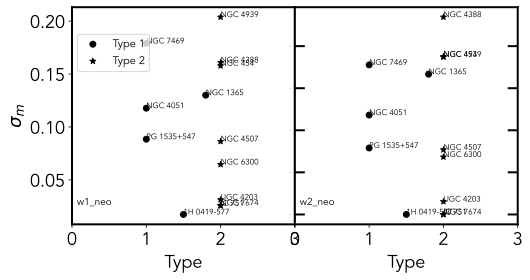

In [124]:
fig = plt.figure(figsize=(8,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(121)

for i in range(len(typeB_plot)):
    type1or2=float(typeB.iloc[i]['type1or2'].split(' ')[1])
    #print(type1or2)
    if type1or2>=1.9:
        color='black'
        label='Type 2'
        marker='*'
    else:
        color='black'
        label='Type 1'
        marker='o'
    ax.text(type1or2,typeB.iloc[i]['sigma_m_w1_neo'],
             typeB.iloc[i]['Name'],fontsize = 8)
    
    ax.scatter(type1or2,typeB.iloc[i]['sigma_m_w1_neo'],
                color=color,marker=marker,
                label=label)
    
ax2 = fig.add_subplot(122)
for i in range(len(typeB_plot)):
    type1or2=float(typeB.iloc[i]['type1or2'].split(' ')[1])
    #print(type1or2)
    if type1or2>=1.9:
        color='black'
        label='Type 2'
        marker='*'
    else:
        color='black'
        label='Type 1'
        marker='o'
    
    ax2.text(type1or2,typeB.iloc[i]['sigma_m_w2_neo'],
             typeB.iloc[i]['Name'],fontsize = 8)
    
    ax2.scatter(type1or2,typeB.iloc[i]['sigma_m_w2_neo'],
                color=color,marker=marker,
                label=label)
    
ax.set_xlabel('Type')
ax2.set_xlabel('Type')
ax.set_ylabel(r'$\sigma_m$')

ax.set_xlim(0,3)
ax2.set_xlim(0,3)
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',labelsize=0)

ax.text(0.1, 0.1, 'w1_neo', horizontalalignment = 'center', 
             verticalalignment = 'center',transform = ax.transAxes, fontsize = 10)
ax2.text(0.1, 0.1, 'w2_neo', horizontalalignment = 'center', 
             verticalalignment = 'center',transform = ax2.transAxes, fontsize = 10)


handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),
          loc=2, numpoints=1,ncol=1,fontsize=11.)
#plt.semilogy()    

### plot_all

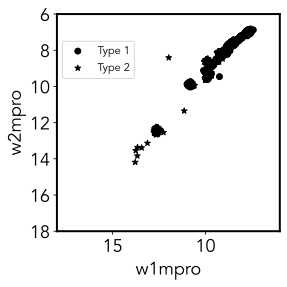

In [125]:
#epsilon_s_w1=0.024
#epsilon_s_w2=0.028
#CLAGN_statistic_2021_liu['sigma_m_w1_neo']=-1
#CLAGN_statistic_2021_liu['sigma_m_w2_neo']=-1

fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for index,i in enumerate(typeB['Name']):
    type1or2=float(typeB.iloc[index]['type1or2'].split(' ')[1])
    #print(type1or2)
    if type1or2>=1.9:
        color='black'
        label='Type 2'
        marker='*'
    else:
        color='black'
        label='Type 1'
        marker='o'
          
    data=pd.read_csv('wise_%s_neo.csv'%i)
    data=data[data['w1mpro'].notnull()]
    data=data[data['w2mpro'].notnull()]
    data=data[data['w1sigmpro'].notnull()]
    data=data[data['w2sigmpro'].notnull()]
    data=data[data['qual_frame']>0]
    data=data.reset_index(drop=True)
    #data=data.fillna(0)
    x_label='w1mpro'
    xerr_label='w1sigmpro'
    y_label='w2mpro'
    yerr_label='w2sigmpro'   
    
    for d in range(len(data)):
        plt.scatter(data.iloc[d][x_label],data.iloc[d][y_label],
                color=color,marker=marker,
                label=label)

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim(18,6)
plt.ylim(18,6)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

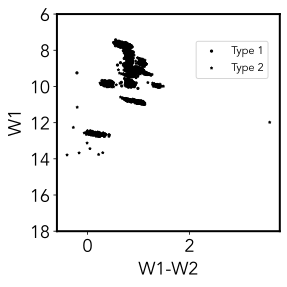

In [141]:
#epsilon_s_w1=0.024
#epsilon_s_w2=0.028
#CLAGN_statistic_2021_liu['sigma_m_w1_neo']=-1
#CLAGN_statistic_2021_liu['sigma_m_w2_neo']=-1

fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

for index,i in enumerate(typeB['Name']):
    type1or2=float(typeB.iloc[index]['type1or2'].split(' ')[1])
    #print(type1or2)
    if type1or2>=1.9:
        color='black'
        label='Type 2'
        marker='*'
    else:
        color='black'
        label='Type 1'
        marker='o'
          
    data=pd.read_csv('wise_%s_neo.csv'%i)
    data=data[data['w1mpro'].notnull()]
    data=data[data['w2mpro'].notnull()]
    data=data[data['w1sigmpro'].notnull()]
    data=data[data['w2sigmpro'].notnull()]
    data=data[data['qual_frame']>0]
    data=data.reset_index(drop=True)
    #data=data.fillna(0)
    x_label='w1mpro'
    xerr_label='w1sigmpro'
    y_label='w2mpro'
    yerr_label='w2sigmpro'   
    
    for d in range(len(data)):
        plt.scatter(data.iloc[d][x_label]-data.iloc[d][y_label],data.iloc[d][x_label],
                color=color,marker=marker,s=size,
                label=label)

plt.xlabel('W1-W2')
plt.ylabel('W1')
#plt.xlim(18,6)
plt.ylim(18,6)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl=handles
#hdl = [h[0] for h in handles]
# use them in the legend
by_label = OrderedDict(zip(labels, hdl)) 
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.6, 0.9),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# hist

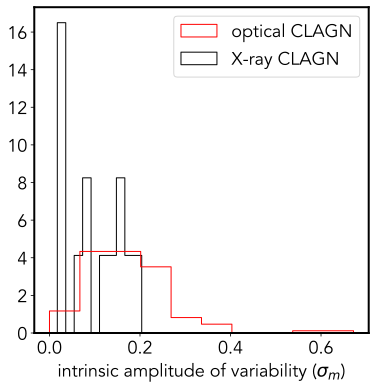

In [129]:
from astropy.visualization import hist

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

hist(typeA['sigma_m_w1_neo'],ax=ax,
         bins=10,
         #bins ='freedman',
         color = 'red',
         density=True,
         zorder=1,histtype='step',
         label='optical CLAGN')

hist(typeB['sigma_m_w1_neo'],ax=ax,
         bins=10,
         #bins ='freedman',
         color = 'black',
         density=True,
         zorder=0,histtype='step',
         label='X-ray CLAGN')
   
#plt.hist(typeA['sigma_m_w1_neo'],color='red',label='optical CLAGN')
#plt.hist(typeB['sigma_m_w1_neo'],color='black',label='X-ray CLAGN')

ax.set_xlabel(r'intrinsic amplitude of variability ($\sigma_m$)')
plt.legend()

In [101]:
typeA.columns

Index(['Name', 'z', 'type', 'ref1', 'logM', 'ref2', 'sigma_m_w1_neo',
       'sigma_m_w2_neo', 'mean_m_w1_neo', 'mean_m_w2_neo', 'sigma_m_w1_mep',
       'sigma_m_w2_mep', 'mean_m_w1_mep', 'mean_m_w2_mep'],
      dtype='object')

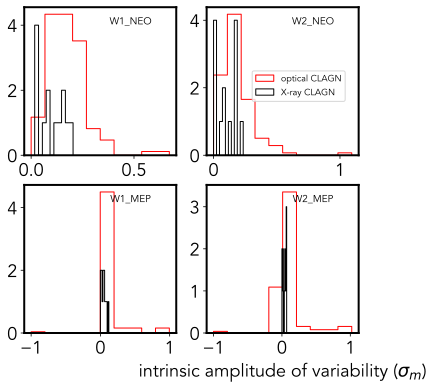

In [136]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.2, wspace = 0.2)

label_bands=['W1_NEO','W2_NEO','W1_MEP','W2_MEP']
label_datas=['sigma_m_w1_neo','sigma_m_w2_neo','sigma_m_w1_mep','sigma_m_w2_mep']

for i,band in enumerate(label_bands):
    ax = fig.add_subplot(2, 2, i+1)
    
    ax.hist(typeA[label_datas[i]],
         bins=10,
         color = 'red',
         density=True,
         zorder=1,histtype='step',
         label='optical CLAGN')

    ax.hist(typeB[label_datas[i]],

         bins=10,
         color = 'black',
         zorder=2,histtype='step',
         label='X-ray CLAGN')
         #hist
#plt.hist(typeA['sigma_m_w1_neo'],color='red',label='optical CLAGN')
#plt.hist(typeB['sigma_m_w1_neo'],color='black',label='X-ray CLAGN')
    ax.text(0.7, 0.9, label_bands[i], horizontalalignment = 'center', 
             verticalalignment = 'center', transform = ax.transAxes, fontsize = 10)

plt.xlabel(r'intrinsic amplitude of variability ($\sigma_m$)')    
plt.legend(bbox_to_anchor=(0.27, 1.8),
          loc=2, numpoints=1,ncol=1, fontsize=9.)
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
fig.savefig('/Users/brettlv/Downloads/CLAGN_statistic_plot/WISE_variability.png', 
            dpi=400, transparent=False, bbox_inches='tight')


    

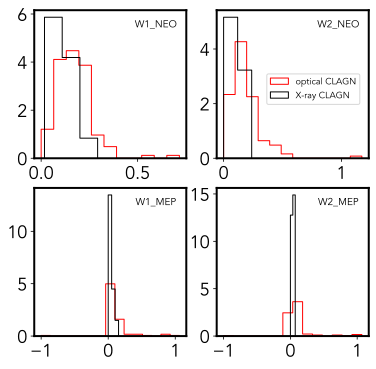

In [137]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.2, wspace = 0.2)

label_bands=['W1_NEO','W2_NEO','W1_MEP','W2_MEP']
label_datas=['sigma_m_w1_neo','sigma_m_w2_neo','sigma_m_w1_mep','sigma_m_w2_mep']

for i,band in enumerate(label_bands):
    ax = fig.add_subplot(2, 2, i+1)
    
    hist(typeA[label_datas[i]],ax=ax,
         #bins=15,
         #bins ='freedman',#blocks,scott,knuth
         bins='scott',
         color = 'red',
         density=True,
         zorder=1,histtype='step',
         label='optical CLAGN')

    hist(typeB[label_datas[i]],ax=ax,
         #bins=15,
         #bins ='freedman',
         bins='scott',
         color = 'black',
         density=True,
         zorder=2,histtype='step',
         label='X-ray CLAGN')
         #hist
#plt.hist(typeA['sigma_m_w1_neo'],color='red',label='optical CLAGN')
#plt.hist(typeB['sigma_m_w1_neo'],color='black',label='X-ray CLAGN')
    ax.text(0.8, 0.9, label_bands[i], horizontalalignment = 'center', 
             verticalalignment = 'center', transform = ax.transAxes, fontsize = 10)
    
plt.legend(bbox_to_anchor=(0.3, 1.8),
          loc=2, numpoints=1,ncol=1, fontsize=9.)

    